# Rotman Summer Datathon - National Women Hockey League

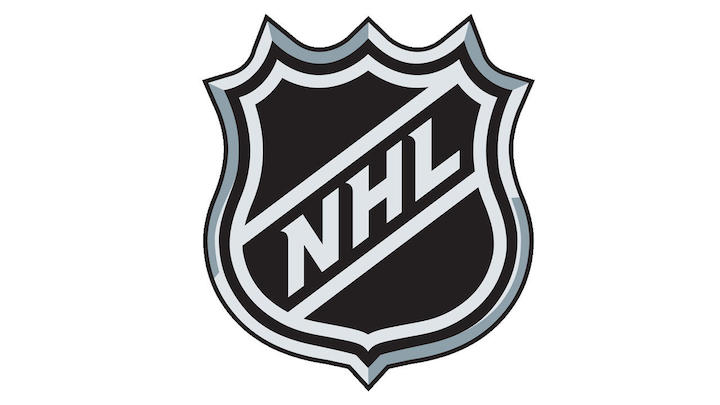

## Data Description:

**Stathletes-tracked women’s hockey data from the NWHL**

<br>1. <b>Game Date</b>: Date on which the game was held
<br>2. <b>Home Team</b>: The team that is playing on their own home venue.
<br>3. <b>Away Team</b>: Visiting team
<br>4. <b>Period</b>: Ice-hockey has 3 periods of 20 min each, giving a total of 60 min regulation playing time. (1,2,3 for regulation). If game is tied at the end of regulation period, winner is decided by an overtime of 5 min. If futher tied, then shootouts (4+ for overtime).
<br>5. <b>Clock</b>: Measure game time
<br>6. <b>Home Team Skaters</b>: How many home team skaters are on the ice at that particular clock time (3-6)
<br>7. <b>Away Team Skaters</b>: How many away team skaters are on the ice at that particular clock time (3-6)
<br>8. <b>Home Team Goals</b>: Current goals scored by the home team at the time of the event
<br>9. <b>Away Team Goals</b>: Current goals scored by the away team at the time of the event

<br>**Event Columns**<br>
<br>10. <b>Team</b>: Name of the team (amongst home or away) responsible for the event
<br>11. <b>Player</b>: Name of the player responsible for the event. Player will thus be of the team mentioned in column 10.
<br>12. <b>Event</b>: 10 events: Shot, goal, play, incomplete play, takeaway, puck-recovery, dump in/out, zone entry, face-off win, penalty taken.
<br>13. <b>X-coordinate</b>: X-coordinate of where an event occurred on the ice, between 0 and 200
<br>14. <b>Y-coordinate</b>: Y-coordinate of where an event occurred on the ice, between 0 and 85
<br>15. <b>Detail 1,2,3,4</b>: Details of the event (could be null)
<br>16. <b>Player2</b>: Secondary Player involved in the event (could be null)
<br>17. <b>X-coordinate2</b>: X-coordinate of a secondary event detail (could be null)
<br>18. <b>Y-coordinate2</b>: Y-coordinate of a secondary event detail (could be null)

In [189]:
event_df <- data.frame(
    event_id = c(1:10)
)
event_df$Event_Type = c('Shot', 'Goal', 'Play' , 'Incomplete Play', 'Takeaway', 'Puck-recovery', 'Dump In/Out', 'Zone Entry', 'Face-Off Win', 'Penalty Taken')
event_df$Description = c('Shot attempts that are unsuccessful (block, miss or save)', 'Shot attempts that are successful (goal)', 'Pass attempts that are successful', 'Pass attempts that are unsuccessful', 'Stealing of the puck leading to change in possesion', 'Possession gains initiated by retrieving a loose puck that was created by a missed/blocked/saved shot, an advance (e.g. dump-out/dump-in), a faceoff or a broken play', 'Actions in which a skater intentionally concedes possession by advancing the puck up ice','Attempts to move the puck into the offensive zone from the neutral zone', 'A method of beginning play in which two opponents face each other and attempt to gain control of a puck placed between them', 'Infractions causing Penalty by the Player')
event_df$Player = c('Shooter', 'Shooter', 'Passer', 'Passer', 'Skater who steals the puck', 'Skater who recovers the puck', 'Skater who dumped/advanced the puck', 'Skater trying to enter the puck to offensive zone', 'Skater who won the draw', 'Skater who made the mistake and took the penalty')
event_df$Player2 = c('NA', 'NA', 'Intended Pass Player of the same Team', 'Intended Pass Player of the same Team', 'NA', 'NA', 'NA', 'Targeted Defender from Opponent Team', 'Skater who lost the draw', 'Skater who drew the penalty')
event_df$XY_Coordinate = c('Release Location of the puck for the unsuccessful Shot', 'Release location of the puck for the Goal', 'Pass release/target location', 'Pass release/target location', 'Location where the skater gained possession when taking the puck away', 'Location where skater gained possession of the puck', 'Location where skater released the puck for dumping/advancing it', 'Point where puck crossed the blueline for passes and carries', 'Location of faceoff dot', 'Location of infraction/fault')
event_df$Details = c('1. Shot Type(Deflection, Fan, Slapshot, Snapshot, Wrap around, Wristshot), 2. Shot destination (on net, missed or blocked), 3. Traffic (true or false), 4. One timer (true or false)', '1. Shot Type(Deflection, Fan, Slapshot, Snapshot, Wrap around, Wristshot), 2. Shot destination (on net, missed or blocked), 3. Traffic (true or false), 4. One timer (true or false)', '1. Pass Type(Direct (eg. a tape-to-tape pass) or Indirect (eg. a pass that is rimmed around the boards))', '1. Pass Type(Direct (eg. a tape-to-tape pass) or Indirect (eg. a pass that is rimmed around the boards))', 'NA', 'NA', '1. Possession Outcome (Retained, Lost)', '1. Entry Type (Carried, Dumped, Played)', 'NA', '1. Infraction Type (e.g. Slashing, Tripping, Roughing, Hooking, ...)')

event_df

event_id,Event_Type,Description,Player,Player2,XY_Coordinate,Details
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Shot,"Shot attempts that are unsuccessful (block, miss or save)",Shooter,NA,Release Location of the puck for the unsuccessful Shot,"1. Shot Type(Deflection, Fan, Slapshot, Snapshot, Wrap around, Wristshot), 2. Shot destination (on net, missed or blocked), 3. Traffic (true or false), 4. One timer (true or false)"
2,Goal,Shot attempts that are successful (goal),Shooter,NA,Release location of the puck for the Goal,"1. Shot Type(Deflection, Fan, Slapshot, Snapshot, Wrap around, Wristshot), 2. Shot destination (on net, missed or blocked), 3. Traffic (true or false), 4. One timer (true or false)"
3,Play,Pass attempts that are successful,Passer,Intended Pass Player of the same Team,Pass release/target location,1. Pass Type(Direct (eg. a tape-to-tape pass) or Indirect (eg. a pass that is rimmed around the boards))
4,Incomplete Play,Pass attempts that are unsuccessful,Passer,Intended Pass Player of the same Team,Pass release/target location,1. Pass Type(Direct (eg. a tape-to-tape pass) or Indirect (eg. a pass that is rimmed around the boards))
5,Takeaway,Stealing of the puck leading to change in possesion,Skater who steals the puck,NA,Location where the skater gained possession when taking the puck away,NA
6,Puck-recovery,"Possession gains initiated by retrieving a loose puck that was created by a missed/blocked/saved shot, an advance (e.g. dump-out/dump-in), a faceoff or a broken play",Skater who recovers the puck,NA,Location where skater gained possession of the puck,NA
7,Dump In/Out,Actions in which a skater intentionally concedes possession by advancing the puck up ice,Skater who dumped/advanced the puck,NA,Location where skater released the puck for dumping/advancing it,"1. Possession Outcome (Retained, Lost)"
8,Zone Entry,Attempts to move the puck into the offensive zone from the neutral zone,Skater trying to enter the puck to offensive zone,Targeted Defender from Opponent Team,Point where puck crossed the blueline for passes and carries,"1. Entry Type (Carried, Dumped, Played)"
9,Face-Off Win,A method of beginning play in which two opponents face each other and attempt to gain control of a puck placed between them,Skater who won the draw,Skater who lost the draw,Location of faceoff dot,NA


## Loading Data and Basic Stats

In [190]:
nhwl_df <- read.csv("../input/nhwl-data/Rotman MMA Summer Datathon NWHL.csv")
head(nhwl_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,Player,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,,,,Stephanie Anderson,NA,NA
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,,,,,,NA,NA
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,,,,Maddie Rowe,NA,NA
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,,NA,NA
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,,,,Stephanie Anderson,NA,NA
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:52,5,5,0,0,Boston Pride,Samantha Davis,Puck Recovery,159,26,,,,,,NA,NA


####  Basic exploratory questions

<br> Q1. How many games are there in the dataset
<br> Q2. How many home teams and away teams are there, how many pairs of competing teams are there?
<br> Q3. How many games have each team played?
<br> Q4. How many goals/wins does each team have (overall and per game)?
<br> Q5. Is there any pair of teams that had a tie and thus an overtime (Period = 4+)
<br> Q6. Number of Players who played this season.
<br> Q7. Distribution of Players in Teams
<br> Q8. Good plays by Players: Events could include Goal, Play, Takeaway, Puck Recovery, Face-off Win, Zone entry, Drawing Penalty
<br> Q9. Bad plays by Players: Events could be Shot, Incomplete Play, Taking Penalty
<br> Q10. Distribution of X-Y coordinates of Shots, Goals, Plays, Takeaways, Puck Recovery, Face-off Wins, Zone Entry

In [191]:
## Answer 1: How many games are there in the dataset

cat("Number dates on which games in the dataset were played: ", length(unique(nhwl_df[["game_date"]])))
cat("\n\nThe dates on which these games were played are: \n")
game_dates = unique(nhwl_df[["game_date"]])
for(i in game_dates){
    print(i)
}

Number dates on which games in the dataset were played:  7

The dates on which these games were played are: 
[1] "2021-01-23"
[1] "2021-01-24"
[1] "2021-01-26"
[1] "2021-01-27"
[1] "2021-01-30"
[1] "2021-01-31"
[1] "2021-02-01"


In [192]:
## Answer 2: How many home teams and away teams are there, how many pairs of competing teams are there?

cat("Number of home teams: ", length(unique(nhwl_df[['Home.Team']])))
cat("\n")
for(i in unique(nhwl_df[['Home.Team']])){
    print(i)
}
cat("\nNumber of away teams: ", length(unique(nhwl_df[['Away.Team']])))
cat("\n")
for(i in unique(nhwl_df[['Away.Team']])){
    print(i)
}

# pair of competing teams
nhwl_df$Team.Pairs = paste(nhwl_df$Home.Team, '&', nhwl_df$Away.Team)
cat("\n\nPairs of competing teams: ", length(unique(nhwl_df[['Team.Pairs']])))
pair_of_teams = as.list(unique(nhwl_df[["Team.Pairs"]]))
cat("\n\n")
for(i in pair_of_teams){
    print(as.character(i))
}

Number of home teams:  6
[1] "Minnesota Whitecaps"
[1] "Buffalo Beauts"
[1] "Metropolitan Riveters"
[1] "Boston Pride"
[1] "Connecticut Whale"
[1] "Toronto Six"

Number of away teams:  6
[1] "Boston Pride"
[1] "Connecticut Whale"
[1] "Toronto Six"
[1] "Buffalo Beauts"
[1] "Metropolitan Riveters"
[1] "Minnesota Whitecaps"


Pairs of competing teams:  12

[1] "Minnesota Whitecaps & Boston Pride"
[1] "Buffalo Beauts & Connecticut Whale"
[1] "Metropolitan Riveters & Toronto Six"
[1] "Boston Pride & Buffalo Beauts"
[1] "Connecticut Whale & Metropolitan Riveters"
[1] "Toronto Six & Minnesota Whitecaps"
[1] "Toronto Six & Boston Pride"
[1] "Metropolitan Riveters & Minnesota Whitecaps"
[1] "Connecticut Whale & Boston Pride"
[1] "Buffalo Beauts & Toronto Six"
[1] "Buffalo Beauts & Boston Pride"
[1] "Toronto Six & Connecticut Whale"


In [193]:
goal_df <- nhwl_df[nhwl_df['Event']=='Goal', ]
head(goal_df,3)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,Player,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,Team.Pairs
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<chr>
388,2021-01-23,Minnesota Whitecaps,Boston Pride,1,6:42,5,5,0,0,Boston Pride,Christina Putigna,Goal,175,44,Snapshot,On Net,f,f,,NA,NA,Minnesota Whitecaps & Boston Pride
424,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,Minnesota Whitecaps,Jonna Curtis,Goal,180,39,Snapshot,On Net,f,f,,NA,NA,Minnesota Whitecaps & Boston Pride
880,2021-01-23,Minnesota Whitecaps,Boston Pride,2,8:02,5,5,1,1,Minnesota Whitecaps,Winny Brodt-Brown,Goal,188,55,Snapshot,On Net,t,f,,NA,NA,Minnesota Whitecaps & Boston Pride


In [194]:
# Q3. How many games have each team played?
# Q4. How many goals/wins does each team have (overall and per game)?

## Answer 3 and 4:
library(stringi)

# structure of dataset: 6 rows for 6 teams: 
# Columns: teams, number of games played, total number of goals scored, avg. goals scored per match


# Subsetting the data only for the goals
goal_df <- nhwl_df[nhwl_df['Event']=='Goal', ]
all_teams = as.list(unique(nhwl_df[['Home.Team']]))

team_df <- data.frame(
    Team.Name = c("Minnesota Whitecaps", "Buffalo Beauts", "Metropolitan Riveters", "Boston Pride", "Connecticut Whale", "Toronto Six")
)


# Number of Games played by a team
goals_per_team = list()
index = 1
for (i in all_teams){
    team_bool = as.list(stri_detect_fixed(pair_of_teams, as.character(i)))
    count=0
    for(j in team_bool){
        if(j==TRUE){
            count = count+1
        }
    }
    goals_per_team[[index]] = count
    index = index+1
    }
team_df$Total.Games.Played = c(goals_per_team)


# Number of Goals per team
list_goals = as.list(table(goal_df$Team))
index_goals = 1
goals_scored = list()
for(i in all_teams){
    goals_scored[index_goals] = list_goals[i]
    index_goals = index_goals + 1
}
team_df$Total.Goals = c(goals_scored)

team_df <- transform(team_df, Avg.Goals = as.numeric(Total.Games.Played) / as.numeric(Total.Goals))
team_df <- team_df[with(team_df, order(-Avg.Goals)), ]
cat("\nTeams Games and Goals Summary (sorted by Avg.Goals scored): \n")
team_df


Teams Games and Goals Summary (sorted by Avg.Goals scored): 


,Team.Name,Total.Games.Played,Total.Goals,Avg.Goals
,<fct>,<list>,<list>,<dbl>
2,Buffalo Beauts,4,7,0.5714286
5,Connecticut Whale,4,8,0.5000000
3,Metropolitan Riveters,3,7,0.4285714
1,Minnesota Whitecaps,3,11,0.2727273
6,Toronto Six,5,21,0.2380952
4,Boston Pride,5,22,0.2272727


**Buffalo Beauts and Connecticut Whales have a good goal average and their players are worth exploring**

In [195]:
# Q5. Is there any pair of teams that had a tie and thus an overtime (Period = 4+)
# Answere 5:

tie_df <- nhwl_df[nhwl_df$Period > 3, ]
#head(tie_df, 3)
cat("Number of Ties in the dataset: ", nrow(tie_df))
cat("\n\n")
teams_with_ties = as.list(table(tie_df$Team.Pairs))

print(teams_with_ties)

Number of Ties in the dataset:  262

$`Buffalo Beauts & Connecticut Whale`
[1] 133

$`Toronto Six & Minnesota Whitecaps`
[1] 129



In [196]:
# Q6. Number of Players who played this season.

# Answers:

# Number of Players:
cat("Number of players in the dataset: ", length(unique(nhwl_df[["Player"]])))

player_prim= as.list(unique(nhwl_df[["Player"]]))
player_temp= as.list(unique(nhwl_df[["Player.2"]]))
player_sec = list()

index = 1
for(i in player_temp){
    if("" %in% as.character(i)){
        cat("")
        #print("Null elliminated from Player 2 list")
    }
    else{
        player_sec[index] = player_temp[i]
        index=index+1
    }
}

cat("\nNumber of secondary players in the dataset: ", length(player_sec))

all_players = c(player_prim, player_sec)
all_players = unique(unlist(all_players))
all=list()
index=1
for(i in all_players){
    if("" %in% as.character(i)){
        cat("")
        print("Null elliminated from Player 2 list")
    }
    else{
        #print(i)
        all[index] = i
        index=index+1
    }
}

cat("\n\nTotal number of players: ", length(all))
cat("\nIntersection of the lists Player and Player 2: ", length(Reduce(intersect,list(player_prim, player_sec))))

Number of players in the dataset:  126
Number of secondary players in the dataset:  117[1] "Null elliminated from Player 2 list"


Total number of players:  126
Intersection of the lists Player and Player 2:  117

In [197]:
players_df <- data.frame(index=c(1:126))
players_df$Player = c(all)

head(players_df,10)

,index,Player
,<int>,<list>
1,1,Jillian Dempsey
2,2,McKenna Brand
3,3,Tereza Vanisova
4,4,Samantha Davis
5,5,Stephanie Anderson
6,6,Meghan Lorence
7,7,Mallory Souliotis
8,8,Taylor Wenczkowski
9,9,Sydney Baldwin


In [198]:
# Q7. Distribution of Players in Teams

# Answer:

# Table structure: Team (6), Number of Players, Player Names
# Columns to refer: Team, Player in the nhwl_df

library(dplyr)

nhwl_df %>%
    group_by(Team) %>%
    summarise(Number_of_Players = n_distinct(Player))


Team,Number_of_Players
<fct>,<int>
Boston Pride,21
Buffalo Beauts,21
Connecticut Whale,25
Metropolitan Riveters,20
Minnesota Whitecaps,19
Toronto Six,20


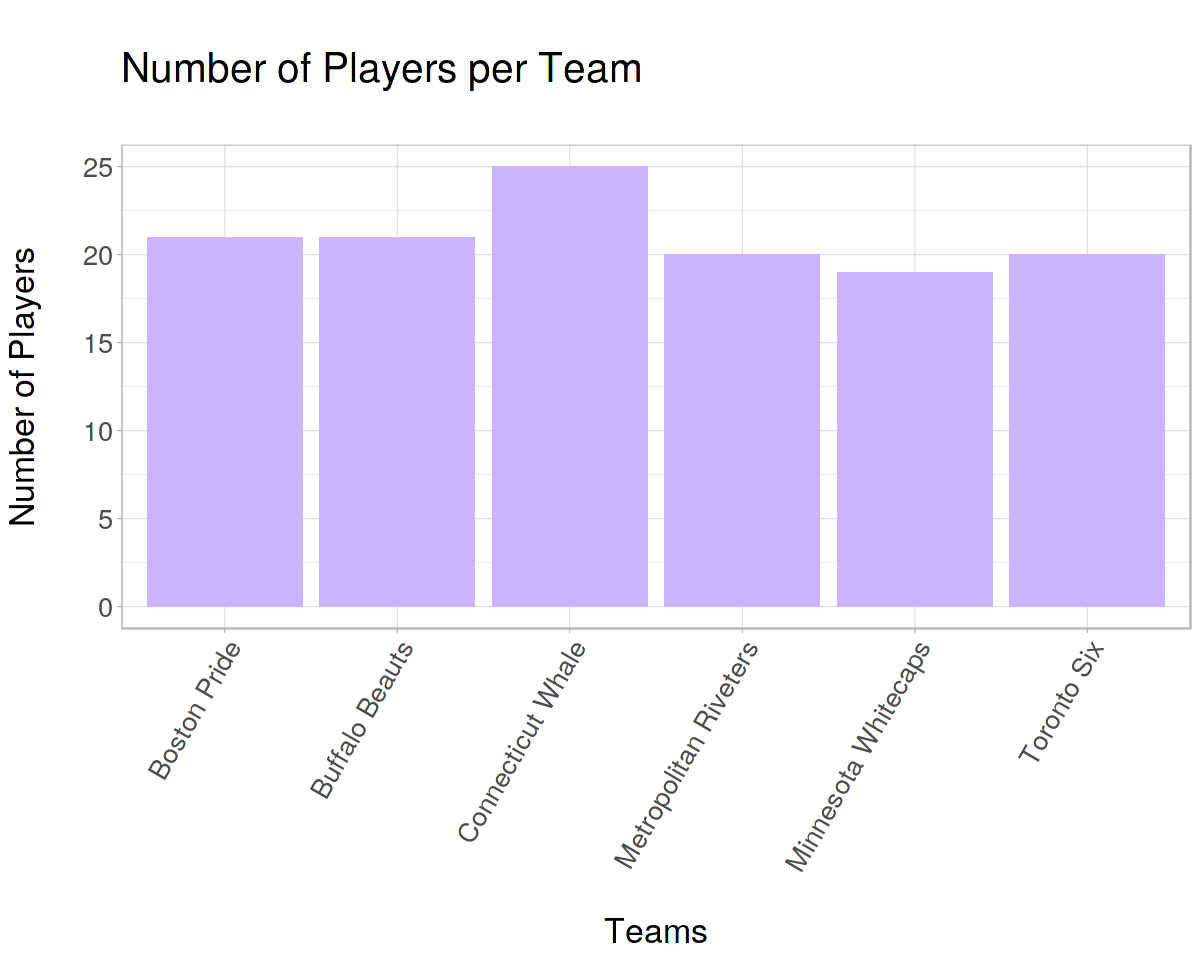

In [199]:
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

nhwl_df %>%
    group_by(Team) %>%
    summarise(Number_of_Players = n_distinct(Player)) %>%

ggplot(aes(x = Team, y = Number_of_Players, fill = Team)) +
    geom_bar(stat = "identity", fill="#ccb3ff") +
    theme_light() +
    theme(text = element_text(size=20),
                axis.text.x = element_text(angle=60, hjust=1)) +
    labs(
        x = "\nTeams",
        y = "Number of Players\n",
        title = paste(
            "\nNumber of Players per Team\n"
        )
    )

In [200]:
# Count of events per player

head(nhwl_df %>%
    group_by(Player) %>%
    count(Event, sort=TRUE), 10)

Player,Event,n
<fct>,<fct>,<int>
Kaleigh Fratkin,Play,242
Kaleigh Fratkin,Puck Recovery,233
Mallory Souliotis,Puck Recovery,196
Mallory Souliotis,Play,175
Taylor Woods,Puck Recovery,175
Lauren Kelly,Puck Recovery,174
Sarah Steele,Play,158
Taylor Woods,Play,157
Taylor Turnquist,Puck Recovery,156


## Best Goalers

In [201]:
# Goalers - simple stats

head(goal_df %>%
        group_by(Player) %>%
        count(Event, sort=TRUE),5)

Player,Event,n
<fct>,<fct>,<int>
Mikyla Grant-Mentis,Goal,5
Samantha Davis,Goal,4
Taylor Woods,Goal,4
Autumn MacDougall,Goal,3
Jillian Dempsey,Goal,3


In [202]:
# Finding the time on ice of each player

time_on_ice <- nhwl_df %>%
        group_by(Player, game_date, Period) %>%
        summarize(Distinct_Periods = n_distinct(Period))

time_on_ice <- time_on_ice %>%
    mutate(Time_per_Period = ifelse(Distinct_Periods %in% c('1', '2', '3'), 20, 5))

time_on_ice <- time_on_ice %>%
                group_by(Player) %>%
                summarise(Time_on_Ice = sum(Time_per_Period))

head(time_on_ice)

`summarise()` has grouped output by 'Player', 'game_date'. You can override using the `.groups` argument.



Player,Time_on_Ice
<fct>,<dbl>
Abbie Ives,160
Allie Olnowich,180
Allie Thunstrom,260
Alyson Matteau,380
Alyssa Wohlfeiler,260
Amanda Conway,240


In [203]:
# Getting the best goaler 

# Average Goals:
# 1. Goals per Game
# 2. Goals per Shots
# 3. Weighted average of the 1. and 2.


## Player wise grouping for the 7 days league:

# Total goals scored
total_goals_df <- goal_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_goals_df)[names(total_goals_df) == "n"] <- "Total_Goals"
drop_colnames <- c("Event")
total_goals_df <- total_goals_df[ , !(names(total_goals_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total shots (unsuccessful) attempted by the players
shots_df <- nhwl_df[nhwl_df['Event']=='Shot',]
total_shots_df <- shots_df %>%
                    group_by(Player) %>%
                    count(Event)
names(total_shots_df)[names(total_shots_df) == "n"] <- "Total_Shots"
drop_colnames <- c("Event")
total_shots_df <- total_shots_df[ , !(names(total_shots_df) %in% drop_colnames)]


## Adding left out players
## Summary of players who never scored a goal
players_win = as.vector(total_goals_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never scored a goal: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Goals")
total_goals_df <- rbind.data.frame(total_goals_df, added_players)


## Adding left out players
## Summary of players who never shot
players_win = as.vector(total_shots_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("\nNumber of players who never shot: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Shots")
total_shots_df <- rbind.data.frame(total_shots_df, added_players)


# Merging the tables to form the summary 
goal_summary_df <- merge(total_games_df, total_goals_df, by=c("Player"))
goal_summary_df <- merge(goal_summary_df, total_shots_df, by=c("Player"))
goal_summary_df <- merge(goal_summary_df, time_on_ice, by=c("Player"))

# Getting the average and weighted average
goal_summary_df <- transform(goal_summary_df, Goals_per_Game = as.numeric(Total_Goals) / as.numeric(Number_of_Games))
goal_summary_df <- transform(goal_summary_df, Points_per_60 = as.numeric(Total_Goals) / as.numeric(Time_on_Ice))
goal_summary_df <- transform(goal_summary_df, Shooting_Percentage = as.numeric(Total_Goals) / (as.numeric(Total_Shots) + as.numeric(Total_Goals)))
goal_summary_df <- transform(goal_summary_df, Weighted_Goal_Avg = ((as.numeric(Shooting_Percentage) + as.numeric(Points_per_60))/2))

# Sort by weighted goal average
goal_summary_df <- goal_summary_df[with(goal_summary_df, order(-Weighted_Goal_Avg)), ]

# Reset index to get rankings
row.names(goal_summary_df) <- NULL


# Display final table
cat("\nBest Goalers Summary \n")
head(goal_summary_df, 15)

Number of players who never scored a goal:  80
Number of players who never shot:  14
Best Goalers Summary 


,Player,Number_of_Games,Total_Goals,Total_Shots,Time_on_Ice,Goals_per_Game,Points_per_60,Shooting_Percentage,Weighted_Goal_Avg
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Leila Kilduff,3,2,5,180,0.6666667,0.011111111,0.28571429,0.14841270
2,Cailey Hutchison,3,1,4,120,0.3333333,0.008333333,0.20000000,0.10416667
3,Winny Brodt-Brown,4,1,5,240,0.2500000,0.004166667,0.16666667,0.08541667
4,Autumn MacDougall,6,3,18,380,0.5000000,0.007894737,0.14285714,0.07537594
5,Haley Mack,4,2,13,260,0.5000000,0.007692308,0.13333333,0.07051282
6,Audra Richards,4,2,14,260,0.5000000,0.007692308,0.12500000,0.06634615
7,Rebecca Russo,3,1,7,160,0.3333333,0.006250000,0.12500000,0.06562500
8,Jillian Dempsey,6,3,24,360,0.5000000,0.008333333,0.11111111,0.05972222
9,Emily Janiga,3,1,8,180,0.3333333,0.005555556,0.11111111,0.05833333


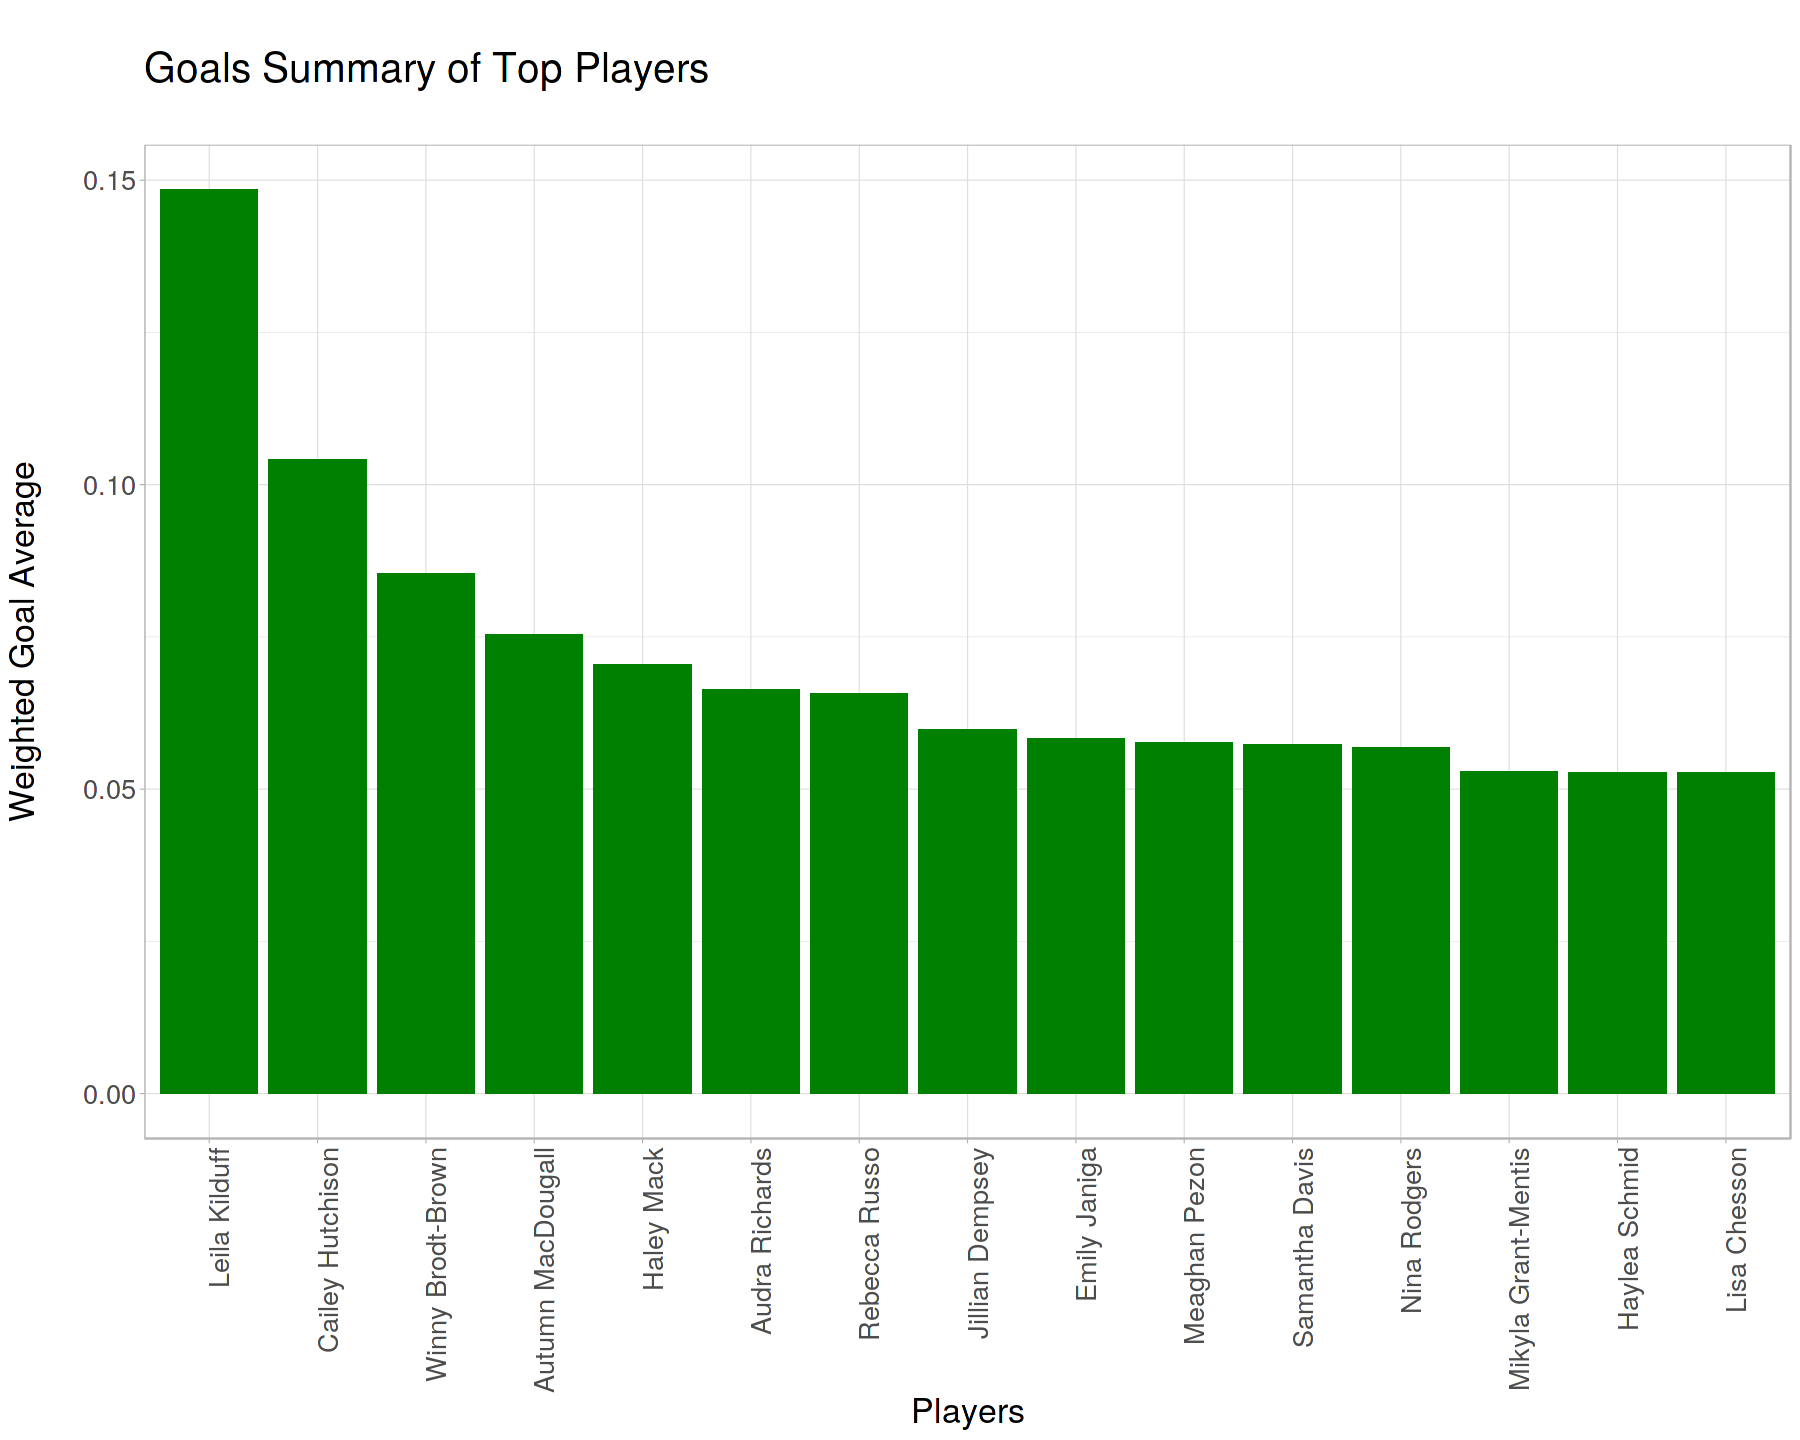

In [204]:
# Plotting the Goal Summary

library(plotly)
library(ggplot2)
library(shiny)
library(repr)
options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_goal_summary_df <- goal_summary_df[1:15, ]

# Use factor to lock the order
subset_goal_summary_df$Player <- factor(subset_goal_summary_df$Player, levels = subset_goal_summary_df$Player[order(-subset_goal_summary_df$Weighted_Goal_Avg)])

# Plot
output <- ggplot(subset_goal_summary_df, mapping=aes(x=Player, y=Weighted_Goal_Avg)) +
       geom_bar(stat = "identity", fill="#008000") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Weighted Goal Average\n",
        title = paste(
            "\nGoals Summary of Top Players\n"
        )
      )

print(output)

## Best Passers

In [205]:
## Setting the dataframe
# Play - successful passes
# Incomplete Play - unsucessful passes

play_df = nhwl_df[nhwl_df$Event == 'Play', ]
incomplete_play_df = nhwl_df[nhwl_df$Event == 'Incomplete Play',]

In [206]:
head(play_df %>%
        group_by(Player) %>%
        count(Event, sort=TRUE),5)

Player,Event,n
<fct>,<fct>,<int>
Kaleigh Fratkin,Play,242
Mallory Souliotis,Play,175
Sarah Steele,Play,158
Taylor Woods,Play,157
Shiann Darkangelo,Play,154


In [207]:
# Getting the best Passers 

# Average Plays:
# 1. Plays per Game
# 2. Plays per (Total Plays - successful and unsuccessful)
# 3. Weighted average of the 1. and 2.


## Player wise grouping for the 7 days league:

# Total passes scored
total_plays_df <- play_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_plays_df)[names(total_plays_df) == "n"] <- "Total_Plays"
drop_colnames <- c("Event")
total_plays_df <- total_plays_df[ , !(names(total_plays_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total passes (unsuccessful) attempted by the players
total_incomplete_plays_df <- incomplete_play_df %>%
                                group_by(Player) %>%
                                count(Event, sort=TRUE)
names(total_incomplete_plays_df)[names(total_incomplete_plays_df) == "n"] <- "Total_Incomplete_Plays"
drop_colnames <- c("Event")
total_incomplete_plays_df <- total_incomplete_plays_df[ , !(names(total_incomplete_plays_df) %in% drop_colnames)]
## now this dataframe has 3 less players meaning 3 players have played and didn't have any incomplete plays

## Summary of players who never had an incomplete play
players_play = as.vector(total_plays_df$Player)
players_incomplete_play = as.vector(total_incomplete_plays_df$Player)
cat("Players who never had an incomplete play: ")
setdiff(players_play, players_incomplete_play)
cat("\n")

# Adding those players
added_players<-data.frame(c("Victoria Hanson", "Samantha Ridgewell", "Caty Flagg"),
                          c(0,0,0))
names(added_players)<-c("Player","Total_Incomplete_Plays")
total_incomplete_plays_df <- rbind.data.frame(total_incomplete_plays_df, added_players)

# Merging the tables to form the summary 
play_summary_df <- merge(total_plays_df, total_games_df, by=c("Player"), all.total_plays_df=TRUE)
play_summary_df <- merge(play_summary_df, total_incomplete_plays_df, by=c("Player"), all.play_summary_df=TRUE)

# Getting the average and weighted average
play_summary_df <- transform(play_summary_df, Avg_Passes_per_Game = as.numeric(Total_Plays) / as.numeric(Number_of_Games))
play_summary_df <- transform(play_summary_df, Avg_Success_Passes_per_Play = as.numeric(Total_Plays) / (as.numeric(Total_Incomplete_Plays) + as.numeric(Total_Plays)))
play_summary_df <- transform(play_summary_df, Weighted_Pass_Avg = ((as.numeric(Avg_Passes_per_Game) + as.numeric(Avg_Success_Passes_per_Play))/2))

# Sort by weighted goal average
play_summary_df <- play_summary_df[with(play_summary_df, order(-Weighted_Pass_Avg)), ]

# Reset index to get rankings
row.names(play_summary_df) <- NULL


# Display final table
cat("\nBest Passers Summary \n")
head(play_summary_df, 5)

Players who never had an incomplete play: 

[1] "Victoria Hanson"    "Samantha Ridgewell" "Caty Flagg"



Best Passers Summary 


,Player,Total_Plays,Number_of_Games,Total_Incomplete_Plays,Avg_Passes_per_Game,Avg_Success_Passes_per_Play,Weighted_Pass_Avg
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Kaleigh Fratkin,242,7,90,34.57143,0.7289157,17.65017
2,Kiira Dosdall,91,3,34,30.33333,0.7280000,15.53067
3,Sydney Baldwin,112,4,49,28.00000,0.6956522,14.34783
4,Sarah Steele,158,6,55,26.33333,0.7417840,13.53756
5,Taylor Woods,157,6,46,26.16667,0.7733990,13.47003


In [208]:
# The players who have no incomplete plays

added_players_list = as.vector(added_players$Player)
total_plays_df[total_plays_df$Player %in% added_players_list, ]
total_games_df[total_games_df$Player %in% added_players_list, ]

Player,Total_Plays
<fct>,<int>
Victoria Hanson,12
Samantha Ridgewell,10
Caty Flagg,1


Player,Number_of_Games
<fct>,<int>
Caty Flagg,1
Samantha Ridgewell,1
Victoria Hanson,3


The players who never had incomplete plays actually played very few games and had lesser number of successful plays as compared to other top passers

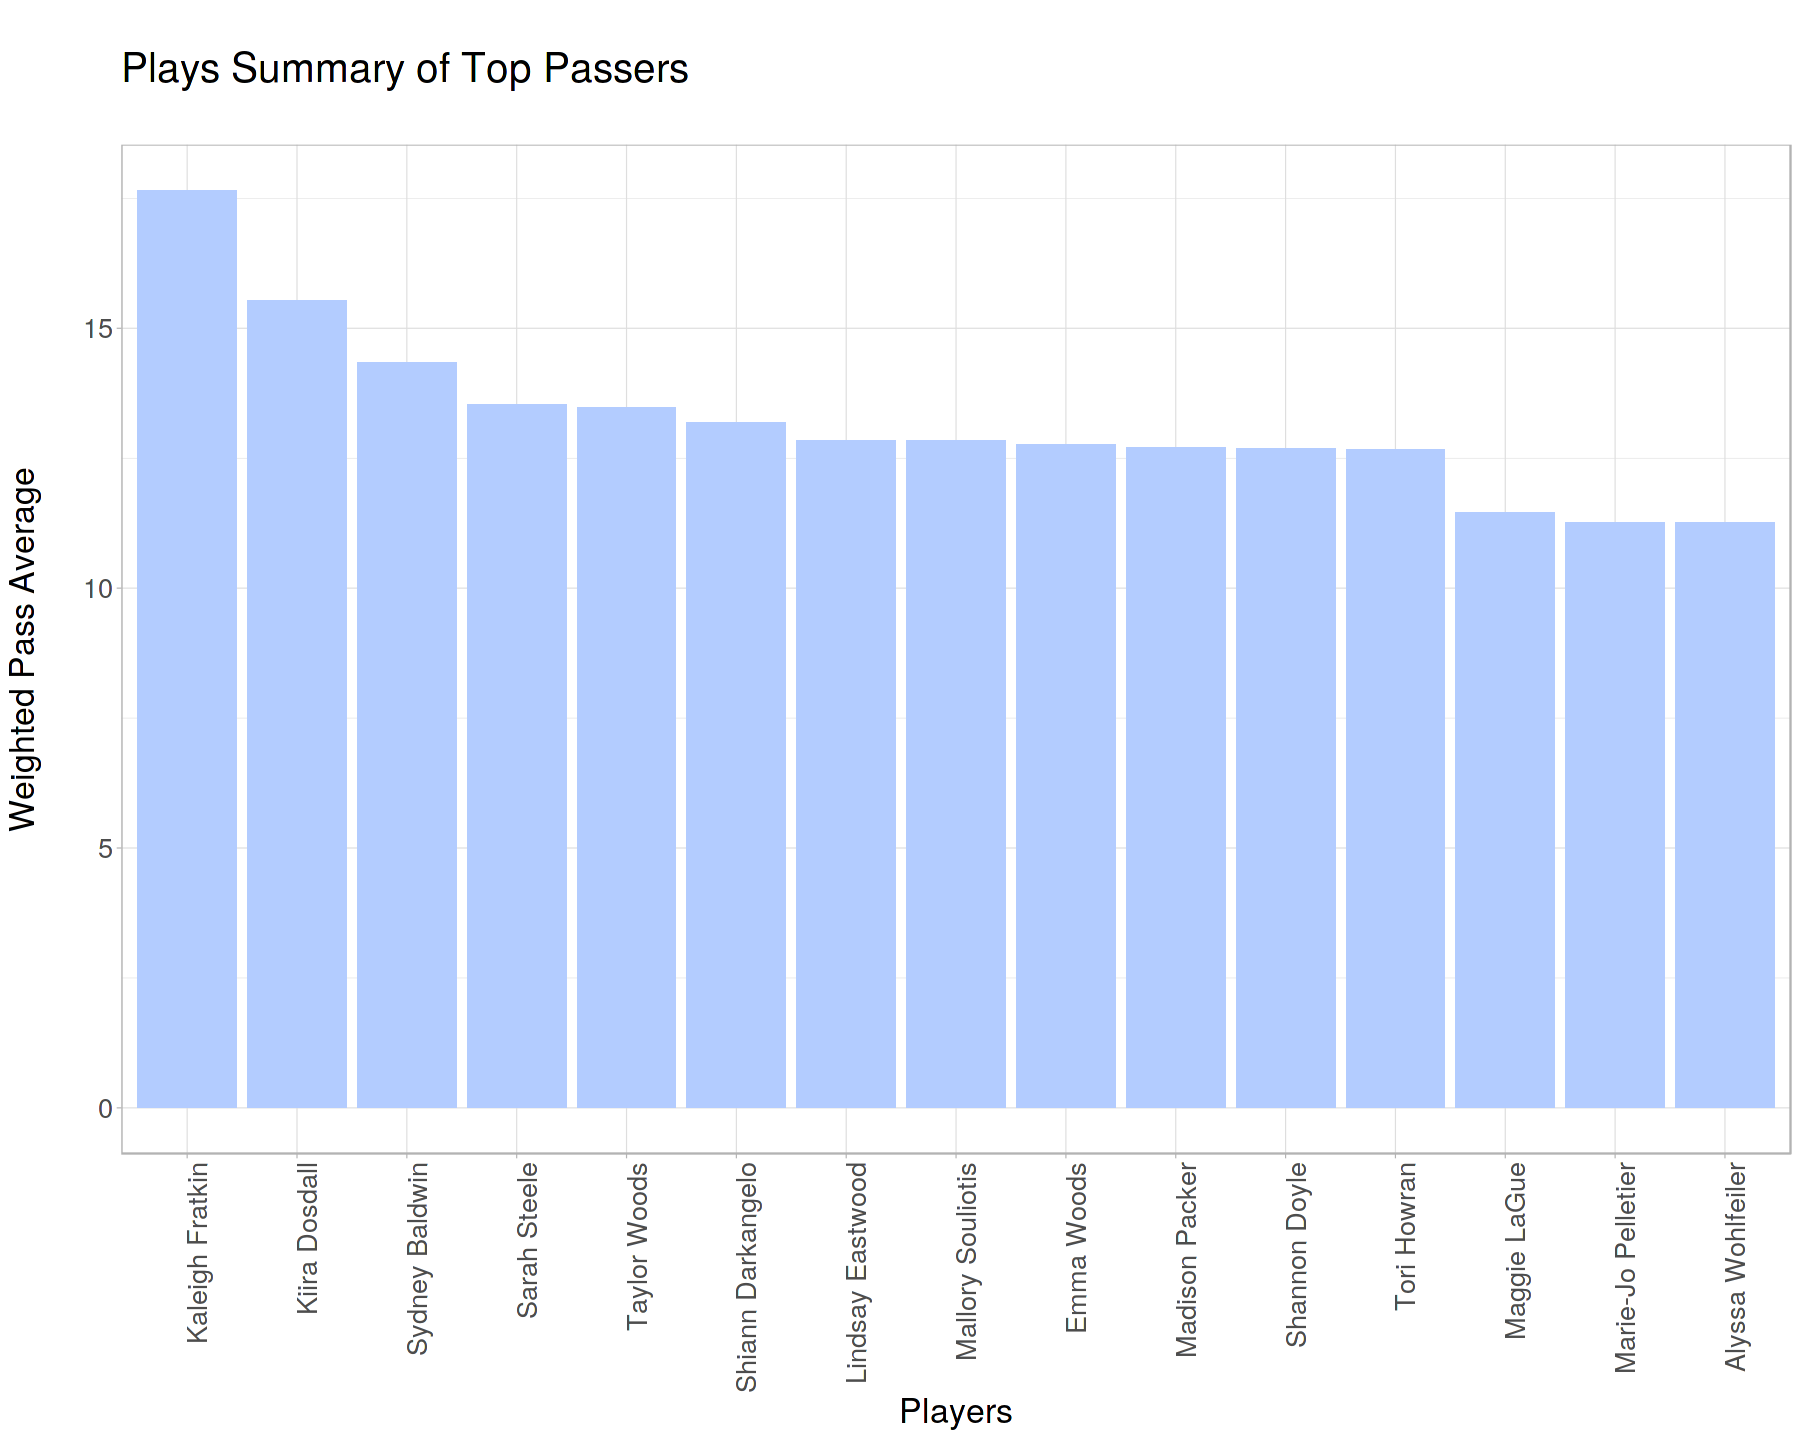

In [209]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_pass_summary_df <- play_summary_df[1:15, ]

# Use factor to lock the order
subset_pass_summary_df$Player <- factor(subset_pass_summary_df$Player, levels = subset_pass_summary_df$Player[order(-subset_pass_summary_df$Weighted_Pass_Avg)])

# Plot
output <- ggplot(subset_pass_summary_df, mapping=aes(x=Player, y=Weighted_Pass_Avg)) +
       geom_bar(stat = "identity", fill="#b3ccff") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Weighted Pass Average\n",
        title = paste(
            "\nPlays Summary of Top Passers\n"
        )
      )

print(output)

In [210]:
excellent_goalers = as.vector(subset_goal_summary_df$Player)
excellent_passers = as.vector(subset_pass_summary_df$Player)

cat("Players who excelled as both Goalers and Passers: ")
intersect(excellent_goalers, excellent_passers)

Players who excelled as both Goalers and Passers: 

character(0)

**Thus Taylor Woods and Mallory Souliotis are top players in terms of both Goals and Passes**

In [211]:
# Analyzing the trajectory of players that lead to goal

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
taylor_df <- nhwl_df[nhwl_df$Player == "Taylor Woods", ]
taylor_df <- taylor_df[taylor_df$game_date == "2021-01-24",]

drops = c("game_date","Home.Team", "Away.Team", "X.Coordinate.2", "Y.Coordinate.2", "Team.Pairs")
taylor_df <- taylor_df[ , !(names(taylor_df) %in% drops)]
taylor_df <- taylor_df[taylor_df$Period == '2', ]
head(taylor_df)

,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,Player,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2
,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
9641,2,18:44,5,5,3,1,Toronto Six,Taylor Woods,Puck Recovery,8,15,,,,,
9647,2,18:32,5,5,3,1,Toronto Six,Taylor Woods,Incomplete Play,24,15,Direct,,,,Sarah-Eve Coutu Godbout
9707,2,16:58,5,5,3,1,Toronto Six,Taylor Woods,Puck Recovery,149,82,,,,,
9708,2,16:58,5,5,3,1,Toronto Six,Taylor Woods,Shot,149,82,Snapshot,Blocked,t,f,
9720,2,16:42,5,5,3,1,Toronto Six,Taylor Woods,Puck Recovery,152,81,,,,,
9721,2,16:41,5,5,3,1,Toronto Six,Taylor Woods,Play,152,83,Indirect,,,,Taytum Clairmont


In [212]:
nrow(taylor_df)

[1] 32

**As we can see Taylor Woods consistently performed with a Shot/Play/PuckRecovery to finally get a goal**

## Identifying passers who work well with goalers

1. Success pass rate to scorers -- Player 2 should be in the set of best goalers
2. Per game success pass rate -- number of success passes (or plays) to best goalers divided by the number of games played by the passer
3. Offensive zone pass rate (to any player)
4. Offensive zone pass rate (to best goalers)

In [213]:
pass_to_goalers_df <-  nhwl_df[nhwl_df$Player.2 %in% excellent_goalers, ]
#head(pass_to_goalers_df)
#length(unique(pass_to_goalers_df$Player))

In [214]:
plays_to_goaler_df <- pass_to_goalers_df[pass_to_goalers_df$Event == 'Play',]
incomplete_plays_to_goaler_df <- pass_to_goalers_df[pass_to_goalers_df$Event == 'Incomplete Play',]

In [215]:
# Total passes scored
total_plays_to_goalers_df <- plays_to_goaler_df %>%
                            group_by(Player) %>%
                            count(Event, sort=TRUE)
names(total_plays_to_goalers_df)[names(total_plays_to_goalers_df) == "n"] <- "Total_Plays_to_Best_Goalers"
drop_colnames <- c("Event")
total_plays_to_goalers_df <- total_plays_to_goalers_df[ , !(names(total_plays_to_goalers_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total passes (unsuccessful) attempted by the players
total_incomplete_plays_to_goalers_df <- incomplete_plays_to_goaler_df %>%
                                       group_by(Player) %>%
                                       count(Event, sort=TRUE)
names(total_incomplete_plays_to_goalers_df)[names(total_incomplete_plays_to_goalers_df) == "n"] <- "Total_Incomplete_Plays_to_Best_Goalers"
drop_colnames <- c("Event")
total_incomplete_plays_to_goalers_df <- total_incomplete_plays_to_goalers_df[ , !(names(total_incomplete_plays_to_goalers_df) %in% drop_colnames)]

In [216]:
## Adding left out players for Success Plays 
players_win = as.vector(total_plays_to_goalers_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never played to the best goalers: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Plays_to_Best_Goalers")
total_plays_to_goalers_df <- rbind.data.frame(total_plays_to_goalers_df, added_players)


## Adding left out players for Unsuccessful Plays
players_win = as.vector(total_incomplete_plays_to_goalers_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("\nNumber of players who never even had an unsuccessful play to the best goalers: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Incomplete_Plays_to_Best_Goalers")
total_incomplete_plays_to_goalers_df <- rbind.data.frame(total_incomplete_plays_to_goalers_df, added_players)

Number of players who never played to the best goalers:  38
Number of players who never even had an unsuccessful play to the best goalers:  46

In [217]:
# Merging the tables to form the summary 
success_play_to_goalers <- merge(total_plays_to_goalers_df, total_games_df, by=c("Player"))
success_play_to_goalers <- merge(success_play_to_goalers, total_incomplete_plays_to_goalers_df, by=c("Player"))

# Getting the average and weighted average
success_play_to_goalers <- transform(success_play_to_goalers, Avg_Successful_Plays_to_Goalers = as.numeric(Total_Plays_to_Best_Goalers) / as.numeric(Number_of_Games))
success_play_to_goalers <- transform(success_play_to_goalers, Success_Rate_per_Total_Passes_to_Goalers = as.numeric(Total_Plays_to_Best_Goalers) / (as.numeric(Total_Incomplete_Plays_to_Best_Goalers) + as.numeric(Total_Plays_to_Best_Goalers)))
success_play_to_goalers[is.na(success_play_to_goalers)] <- 0
success_play_to_goalers <- transform(success_play_to_goalers, Weighted_Success_Pass_Rate_to_Goalers = ((as.numeric(Avg_Successful_Plays_to_Goalers) + as.numeric(Success_Rate_per_Total_Passes_to_Goalers))/2))

# Sort by weighted goal average
success_play_to_goalers <- success_play_to_goalers[with(success_play_to_goalers, order(-Weighted_Success_Pass_Rate_to_Goalers)), ]

# Reset index to get rankings
row.names(success_play_to_goalers) <- NULL


# Display final table
cat("\nSuccess Pass Rate to Goalers Summary \n")
head(success_play_to_goalers, 5)


Success Pass Rate to Goalers Summary 


,Player,Total_Plays_to_Best_Goalers,Number_of_Games,Total_Incomplete_Plays_to_Best_Goalers,Avg_Successful_Plays_to_Goalers,Success_Rate_per_Total_Passes_to_Goalers,Weighted_Success_Pass_Rate_to_Goalers
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sydney Baldwin,39,4,23,9.75,0.6290323,5.189516
2,Jonna Curtis,30,4,15,7.50,0.6666667,4.083333
3,Emma Stauber,30,4,18,7.50,0.6250000,4.062500
4,Rebecca Morse,21,3,5,7.00,0.8076923,3.903846
5,Meghan Lorence,28,4,18,7.00,0.6086957,3.804348


## Offensive Zone Passes

In [218]:
offensive_zone_plays_df <- nhwl_df[nhwl_df$X.Coordinate >=177, ]
best_golaers_in_offensive_zone_df <- offensive_zone_plays_df[offensive_zone_plays_df$Player.2 %in% excellent_goalers, ]

#### Overall Offensive Zone Plays Metric

In [219]:
plays_df <- offensive_zone_plays_df[offensive_zone_plays_df$Event == 'Play',]
incomplete_plays_df <- offensive_zone_plays_df[offensive_zone_plays_df$Event == 'Incomplete Play',]

# Total passes scored
total_plays_df <- plays_df %>%
                            group_by(Player) %>%
                            count(Event, sort=TRUE)
names(total_plays_df)[names(total_plays_df) == "n"] <- "Total_Plays_Offensive_Zone"
drop_colnames <- c("Event")
total_plays_df <- total_plays_df[ , !(names(total_plays_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total passes (unsuccessful) attempted by the players
total_incomplete_plays_df <- incomplete_plays_df %>%
                                       group_by(Player) %>%
                                       count(Event, sort=TRUE)
names(total_incomplete_plays_df)[names(total_incomplete_plays_df) == "n"] <- "Total_Incomplete_Plays_Offensive_Zone"
drop_colnames <- c("Event")
total_incomplete_plays_df <- total_incomplete_plays_df[ , !(names(total_incomplete_plays_df) %in% drop_colnames)]

## Adding left out players for Success Plays 
players_win = as.vector(total_plays_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never successfully played in offensive zone: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Plays_Offensive_Zone")
total_plays_df <- rbind.data.frame(total_plays_df, added_players)


## Adding left out players for Unsuccessful Plays
players_win = as.vector(total_incomplete_plays_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("\nNumber of players who never even had an unsuccessful play in offensive zone: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Incomplete_Plays_Offensive_Zone")
total_incomplete_plays_df <- rbind.data.frame(total_incomplete_plays_df, added_players)


# Merging the tables to form the summary 
success_play_oz_df <- merge(total_plays_df, total_games_df, by=c("Player"))
success_play_oz_df <- merge(success_play_oz_df, total_incomplete_plays_df, by=c("Player"))

# Getting the average and weighted average
success_play_oz_df <- transform(success_play_oz_df, Avg_Successful_Plays_OZ = as.numeric(Total_Plays_Offensive_Zone) / as.numeric(Number_of_Games))
success_play_oz_df <- transform(success_play_oz_df, Success_Rate_per_Total_Passes_OZ = as.numeric(Total_Plays_Offensive_Zone) / (as.numeric(Total_Plays_Offensive_Zone) + as.numeric(Total_Incomplete_Plays_Offensive_Zone)))
success_play_oz_df[is.na(success_play_oz_df)] <- 0
success_play_oz_df <- transform(success_play_oz_df, Weighted_Overall_Success_Pass_Rate_Offensive_Zone = ((as.numeric(Avg_Successful_Plays_OZ) + as.numeric(Success_Rate_per_Total_Passes_OZ))/2))

# Sort by weighted goal average
success_play_oz_df <- success_play_oz_df[with(success_play_oz_df, order(-Weighted_Overall_Success_Pass_Rate_Offensive_Zone)), ]

# Reset index to get rankings
row.names(success_play_oz_df) <- NULL


# Display final table
cat("\nOverall Success Pass Rate Summary in Offensive Zone\n")
head(success_play_oz_df, 10)

Number of players who never successfully played in offensive zone:  26
Number of players who never even had an unsuccessful play in offensive zone:  28
Overall Success Pass Rate Summary in Offensive Zone


,Player,Total_Plays_Offensive_Zone,Number_of_Games,Total_Incomplete_Plays_Offensive_Zone,Avg_Successful_Plays_OZ,Success_Rate_per_Total_Passes_OZ,Weighted_Overall_Success_Pass_Rate_Offensive_Zone
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Shiann Darkangelo,56,6,24,9.333333,0.7000000,5.016667
2,Kate Leary,20,3,5,6.666667,0.8000000,3.733333
3,Brooke Boquist,27,4,15,6.750000,0.6428571,3.696429
4,Breanne Wilson-Bennett,36,6,18,6.000000,0.6666667,3.333333
5,Alyssa Wohlfeiler,21,4,10,5.250000,0.6774194,2.963710
6,Jonna Curtis,21,4,13,5.250000,0.6176471,2.933824
7,Kelly Babstock,15,3,4,5.000000,0.7894737,2.894737
8,Haley Mack,19,4,7,4.750000,0.7307692,2.740385
9,Kristin Lewicki,29,6,16,4.833333,0.6444444,2.738889


#### Overall Offensive Zone Plays to Best Goalers Metric

In [220]:
plays_df <- best_golaers_in_offensive_zone_df[best_golaers_in_offensive_zone_df$Event == 'Play',]
incomplete_plays_df <- best_golaers_in_offensive_zone_df[best_golaers_in_offensive_zone_df$Event == 'Incomplete Play',]

# Total passes scored
total_plays_df <- plays_df %>%
                            group_by(Player) %>%
                            count(Event, sort=TRUE)
names(total_plays_df)[names(total_plays_df) == "n"] <- "Total_Plays_to_Goalers_in_Offensive_Zone"
drop_colnames <- c("Event")
total_plays_df <- total_plays_df[ , !(names(total_plays_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total passes (unsuccessful) attempted by the players
total_incomplete_plays_df <- incomplete_plays_df %>%
                                       group_by(Player) %>%
                                       count(Event, sort=TRUE)
names(total_incomplete_plays_df)[names(total_incomplete_plays_df) == "n"] <- "Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone"
drop_colnames <- c("Event")
total_incomplete_plays_df <- total_incomplete_plays_df[ , !(names(total_incomplete_plays_df) %in% drop_colnames)]

## Adding left out players for Success Plays 
players_win = as.vector(total_plays_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never successfully played in offensive zone: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Plays_to_Goalers_in_Offensive_Zone")
total_plays_df <- rbind.data.frame(total_plays_df, added_players)


## Adding left out players for Unsuccessful Plays
players_win = as.vector(total_incomplete_plays_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("\nNumber of players who never even had an unsuccessful play in offensive zone: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone")
total_incomplete_plays_df <- rbind.data.frame(total_incomplete_plays_df, added_players)


# Merging the tables to form the summary 
success_play_to_goalers_in_oz_df <- merge(total_plays_df, total_games_df, by=c("Player"))
success_play_to_goalers_in_oz_df <- merge(success_play_to_goalers_in_oz_df, total_incomplete_plays_df, by=c("Player"))

# Getting the average and weighted average
success_play_to_goalers_in_oz_df <- transform(success_play_to_goalers_in_oz_df, Avg_Successful_Plays_to_Goalers_in_OZ = as.numeric(Total_Plays_to_Goalers_in_Offensive_Zone) / as.numeric(Number_of_Games))
success_play_to_goalers_in_oz_df <- transform(success_play_to_goalers_in_oz_df, Success_Rate_per_Total_Passes_OZ_to_Goalers = as.numeric(Total_Plays_to_Goalers_in_Offensive_Zone) / (as.numeric(Total_Plays_to_Goalers_in_Offensive_Zone) + as.numeric(Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone)))
success_play_to_goalers_in_oz_df[is.na(success_play_to_goalers_in_oz_df)] <- 0
success_play_to_goalers_in_oz_df <- transform(success_play_to_goalers_in_oz_df, Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone = ((as.numeric(Avg_Successful_Plays_to_Goalers_in_OZ) + as.numeric(Success_Rate_per_Total_Passes_OZ_to_Goalers))/2))

# Sort by weighted goal average
success_play_to_goalers_in_oz_df <- success_play_to_goalers_in_oz_df[with(success_play_to_goalers_in_oz_df, order(-Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone)), ]

# Reset index to get rankings
row.names(success_play_to_goalers_in_oz_df) <- NULL


# Display final table
cat("\nOverall Success Pass Rate to Best Goalers Summary (in Offensive Zone)\n")
head(success_play_to_goalers_in_oz_df, 10)

Number of players who never successfully played in offensive zone:  78
Number of players who never even had an unsuccessful play in offensive zone:  83
Overall Success Pass Rate to Best Goalers Summary (in Offensive Zone)


,Player,Total_Plays_to_Goalers_in_Offensive_Zone,Number_of_Games,Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone,Avg_Successful_Plays_to_Goalers_in_OZ,Success_Rate_per_Total_Passes_OZ_to_Goalers,Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jonna Curtis,16,4,5,4.000000,0.7619048,2.3809524
2,Kelly Babstock,6,3,3,2.000000,0.6666667,1.3333333
3,Allie Thunstrom,8,4,5,2.000000,0.6153846,1.3076923
4,Theresa Knutson,5,3,1,1.666667,0.8333333,1.2500000
5,Cassidy MacPherson,7,6,0,1.166667,1.0000000,1.0833333
6,Taytum Clairmont,9,6,5,1.500000,0.6428571,1.0714286
7,Kate Leary,4,3,2,1.333333,0.6666667,1.0000000
8,Stephanie Anderson,5,4,2,1.250000,0.7142857,0.9821429
9,Tereza Vanisova,9,7,6,1.285714,0.6000000,0.9428571


## Face-off Win specialist

In [221]:
## Setting the dataframe

face_off_win_df = nhwl_df[nhwl_df$Event == 'Faceoff Win', ]
head(face_off_win_df, 3)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,Player,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,Team.Pairs
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<chr>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,,,,Stephanie Anderson,NA,NA,Minnesota Whitecaps & Boston Pride
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,,,,Stephanie Anderson,NA,NA,Minnesota Whitecaps & Boston Pride
50,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:23,5,5,0,0,Boston Pride,Lexie Laing,Faceoff Win,169,21,Backhand,,,,Audra Richards,NA,NA,Minnesota Whitecaps & Boston Pride


In [222]:
head(face_off_win_df %>%
        group_by(Player) %>%
        summarise(Total_Face_off_Wins=n()) %>%
        arrange(desc(Total_Face_off_Wins)), 5)

Player,Total_Face_off_Wins
<fct>,<int>
Shiann Darkangelo,79
Jillian Dempsey,70
Lexie Laing,55
Tereza Vanisova,51
Jordan Juron,49


In [223]:
# Getting the best Face-off win specialists 

# Average Faceoff wins:
# Wins per Game


## Player wise grouping for the 7 days league:

# Total face-off wins scored
total_faceoff_wins_df <- face_off_win_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_faceoff_wins_df)[names(total_faceoff_wins_df) == "n"] <- "Total_Faceoff_Wins"
drop_colnames <- c("Event")
total_faceoff_wins_df <- total_faceoff_wins_df[ , !(names(total_faceoff_wins_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

## Adding left out players
## Summary of players who never had a faceoff win
players_win = as.vector(total_faceoff_wins_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never had a Face-off Win: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Faceoff_Wins")
total_faceoff_wins_df <- rbind.data.frame(total_faceoff_wins_df, added_players)


# Merging the tables to form the summary 
faceoff_wins_summary_df <- merge(total_faceoff_wins_df, total_games_df, by=c("Player"))

# Getting the average and weighted average
faceoff_wins_summary_df <- transform(faceoff_wins_summary_df, Avg_Faceoff_Wins_per_Game = as.numeric(Total_Faceoff_Wins) / as.numeric(Number_of_Games))

# Sort by weighted goal average
faceoff_wins_summary_df <- faceoff_wins_summary_df[with(faceoff_wins_summary_df, order(-Avg_Faceoff_Wins_per_Game)), ]

# Reset index to get rankings
row.names(faceoff_wins_summary_df) <- NULL


# Display final table
cat("\nFace-off Wins Specialist Summary \n")
head(faceoff_wins_summary_df, 5)

Number of players who never had a Face-off Win:  64
Face-off Wins Specialist Summary 


,Player,Total_Faceoff_Wins,Number_of_Games,Avg_Faceoff_Wins_per_Game
,<fct>,<dbl>,<int>,<dbl>
1,Shiann Darkangelo,79,6,13.16667
2,Jillian Dempsey,70,6,11.66667
3,Emma Vlasic,45,4,11.25000
4,Kayla Friesen,31,3,10.33333
5,Stephanie Anderson,38,4,9.50000


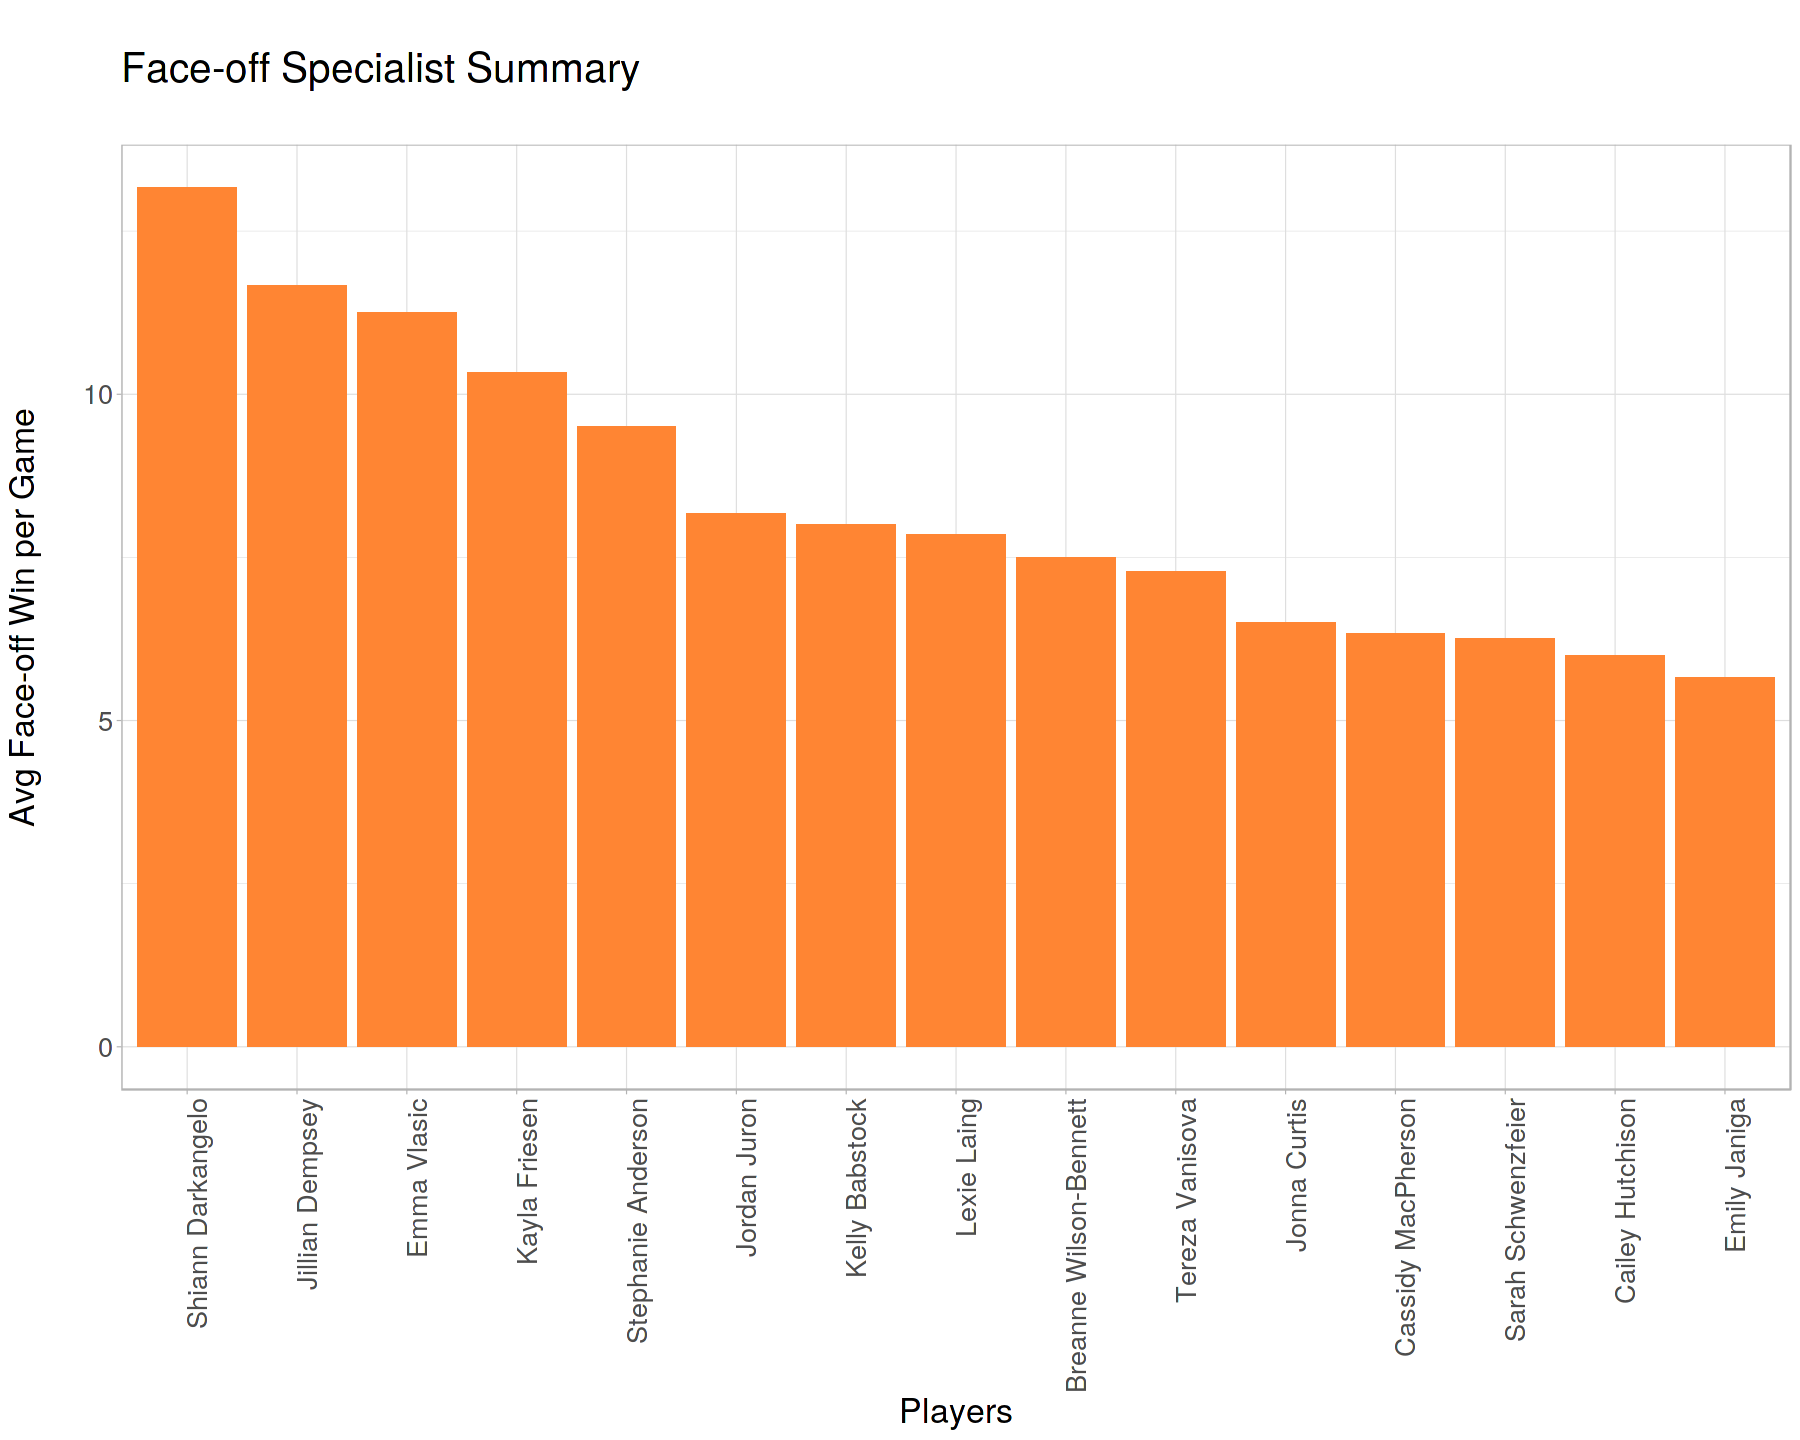

In [224]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_faceoff_win_summary_df <- faceoff_wins_summary_df[1:15, ]

# Use factor to lock the order
subset_faceoff_win_summary_df$Player <- factor(subset_faceoff_win_summary_df$Player, levels = subset_faceoff_win_summary_df$Player[order(-subset_faceoff_win_summary_df$Avg_Faceoff_Wins_per_Game)])

# Plot
output <- ggplot(subset_faceoff_win_summary_df, mapping=aes(x=Player, y=Avg_Faceoff_Wins_per_Game)) +
       geom_bar(stat = "identity", fill="#ff8533") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Avg Face-off Win per Game\n",
        title = paste(
            "\nFace-off Specialist Summary\n"
        )
      )

print(output)

## Takeaway Specialist

In [225]:
## Setting the dataframe

takeaway_df = nhwl_df[nhwl_df$Event == 'Takeaway', ]
head(takeaway_df, 3)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,Player,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,Team.Pairs
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<chr>
11,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:40,5,5,0,0,Boston Pride,Mallory Souliotis,Takeaway,3,49,,,,,,NA,NA,Minnesota Whitecaps & Boston Pride
19,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:25,5,5,0,0,Minnesota Whitecaps,Allie Thunstrom,Takeaway,112,0,,,,,,NA,NA,Minnesota Whitecaps & Boston Pride
54,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:13,5,5,0,0,Minnesota Whitecaps,Winny Brodt-Brown,Takeaway,7,23,,,,,,NA,NA,Minnesota Whitecaps & Boston Pride


In [226]:
# Getting the best Face-off win specialists 

# Average Faceoff wins:
# Wins per Game


## Player wise grouping for the 7 days league:

# Total takeaways scored
total_takeaway_df <- takeaway_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_takeaway_df)[names(total_takeaway_df) == "n"] <- "Total_Takeaways"
drop_colnames <- c("Event")
total_takeaway_df <- total_takeaway_df[ , !(names(total_takeaway_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

## Adding left out players
## Summary of players who never had a takeaway
players_win = as.vector(total_takeaway_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never had a takeaway: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Takeaways")
total_takeaway_df <- rbind.data.frame(total_takeaway_df, added_players)


# Merging the tables to form the summary 
takeaway_summary_df <- merge(total_takeaway_df, total_games_df, by=c("Player"))

# Getting the average and weighted average
takeaway_summary_df <- transform(takeaway_summary_df, Avg_Takeaways_per_Game = as.numeric(Total_Takeaways) / as.numeric(Number_of_Games))

# Sort by weighted goal average
takeaway_summary_df <- takeaway_summary_df[with(takeaway_summary_df, order(-Avg_Takeaways_per_Game)), ]

# Reset index to get rankings
row.names(takeaway_summary_df) <- NULL


# Display final table
cat("\nTakeaway Specialist Summary \n")
head(takeaway_summary_df, 5)

Number of players who never had a takeaway:  12
Takeaway Specialist Summary 


,Player,Total_Takeaways,Number_of_Games,Avg_Takeaways_per_Game
,<fct>,<dbl>,<int>,<dbl>
1,Sydney Baldwin,21,4,5.250000
2,Leila Kilduff,15,3,5.000000
3,Madison Packer,15,3,5.000000
4,Dominique Kremer,29,6,4.833333
5,Stephanie Anderson,19,4,4.750000


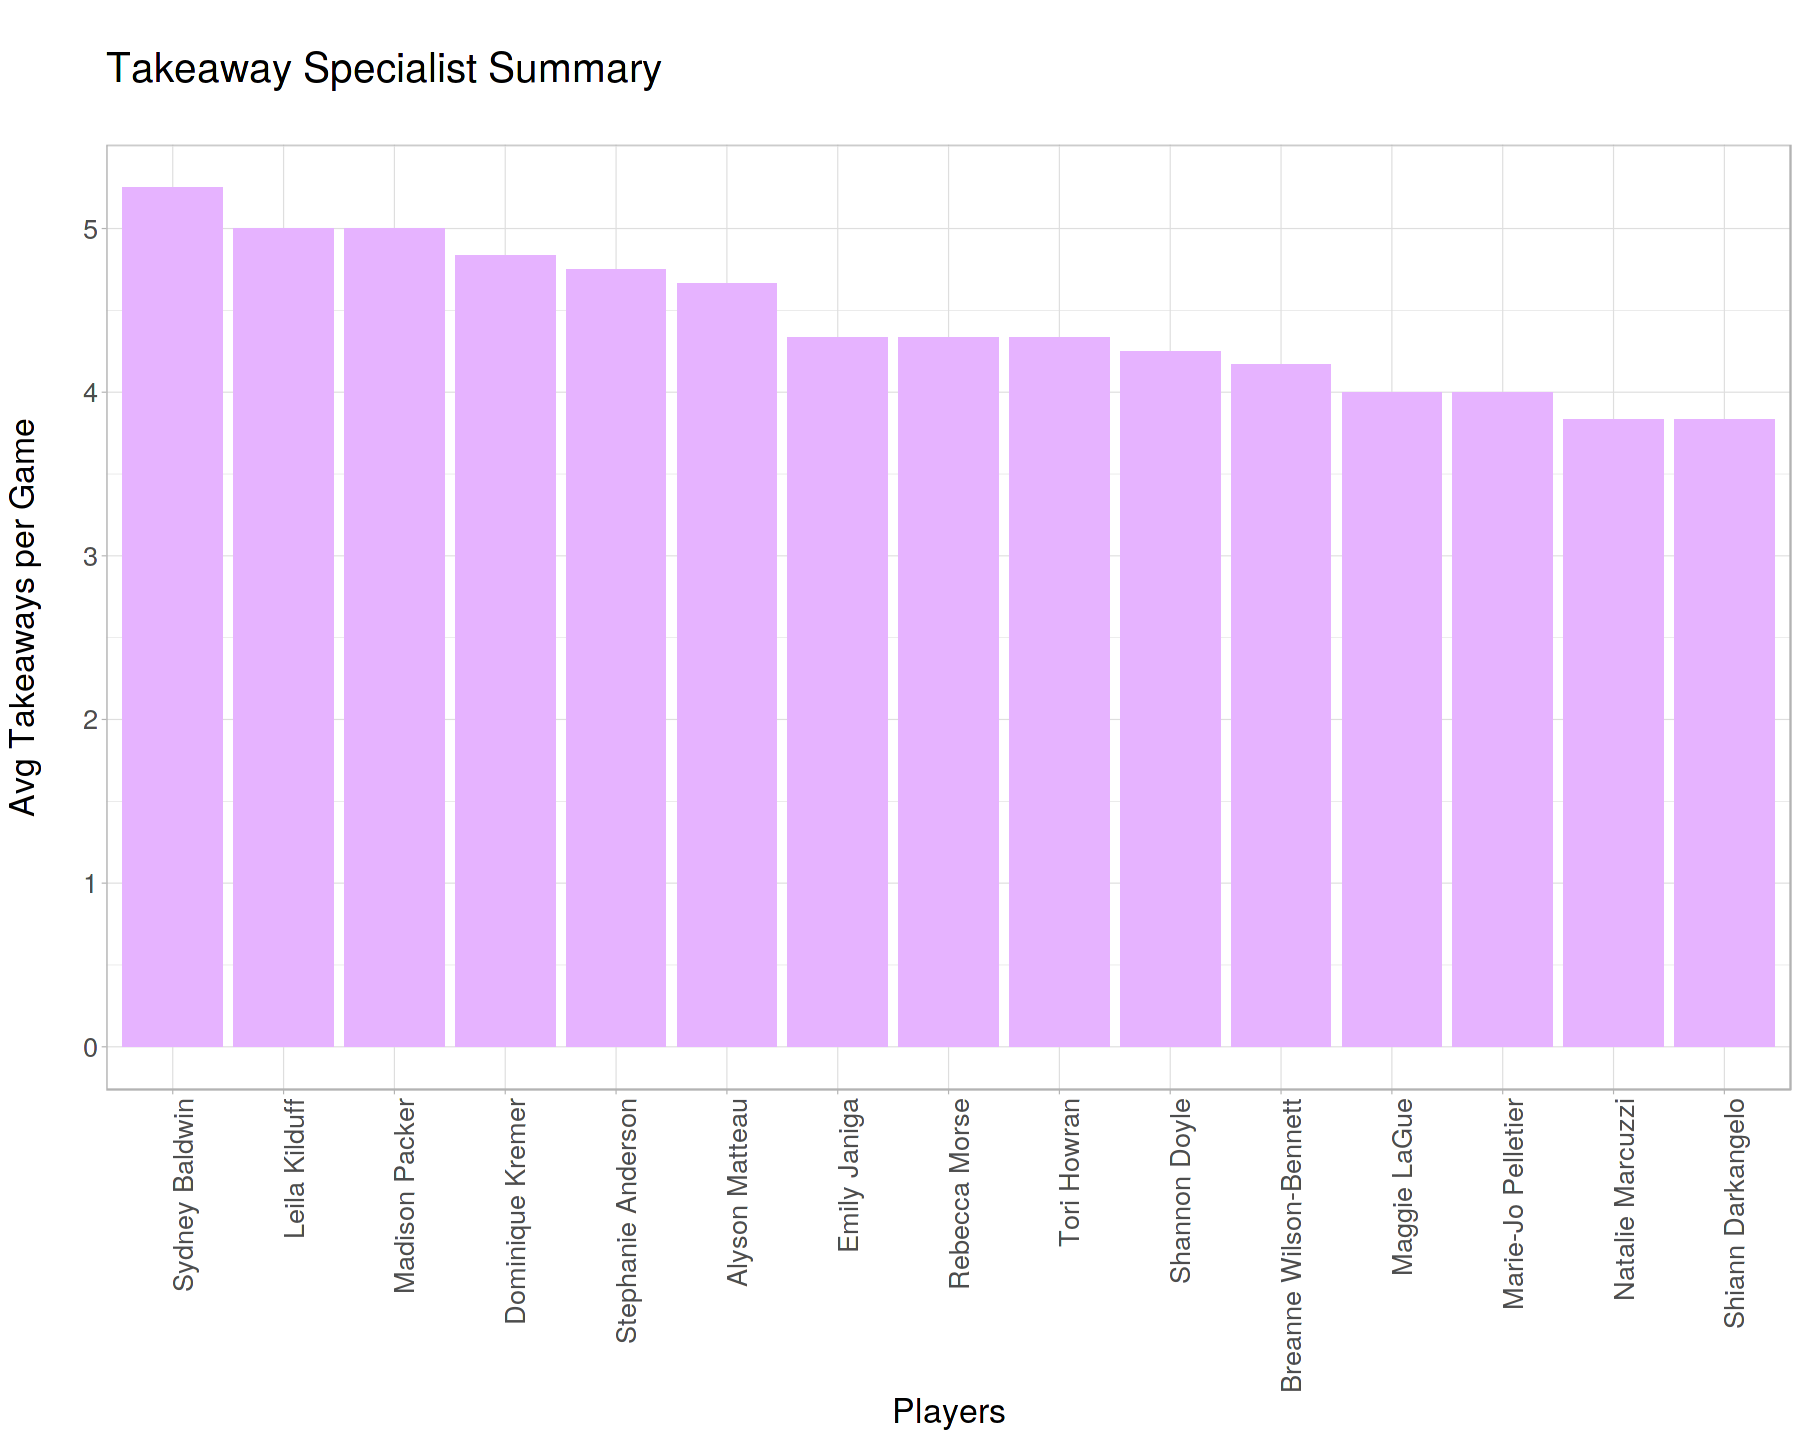

In [227]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_takeaway_summary_df <- takeaway_summary_df[1:15, ]

# Use factor to lock the order
subset_takeaway_summary_df$Player <- factor(subset_takeaway_summary_df$Player, levels = subset_takeaway_summary_df$Player[order(-subset_takeaway_summary_df$Avg_Takeaways_per_Game)])

# Plot
output <- ggplot(subset_takeaway_summary_df, mapping=aes(x=Player, y=Avg_Takeaways_per_Game)) +
       geom_bar(stat = "identity", fill="#e6b3ff") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Avg Takeaways per Game\n",
        title = paste(
            "\nTakeaway Specialist Summary\n"
        )
      )

print(output)

## Zone entry

In [228]:
## Setting the dataframe

zone_entry_df = nhwl_df[nhwl_df$Event == 'Zone Entry', ]
#head(zone_entry_df, 3)

## Getting Avg Zone entries per game

## Player wise grouping for the 7 days league:

# Total zone entries scored
total_zone_entries_df <- zone_entry_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_zone_entries_df)[names(total_zone_entries_df) == "n"] <- "Total_Zone_Entries"
drop_colnames <- c("Event")
total_zone_entries_df <- total_zone_entries_df[ , !(names(total_zone_entries_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

## Adding left out players
## Summary of players who never had a takeaway
players_win = as.vector(total_zone_entries_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never had a zone entry: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Zone_Entries")
total_zone_entries_df <- rbind.data.frame(total_zone_entries_df, added_players)


# Merging the tables to form the summary 
zone_entry_summary_df <- merge(total_zone_entries_df, total_games_df, by=c("Player"))

# Getting the average and weighted average
zone_entry_summary_df <- transform(zone_entry_summary_df, Avg_Zone_entry_per_Game = as.numeric(Total_Zone_Entries) / as.numeric(Number_of_Games))

# Sort by weighted goal average
zone_entry_summary_df <- zone_entry_summary_df[with(zone_entry_summary_df, order(-Avg_Zone_entry_per_Game)), ]

# Reset index to get rankings
row.names(zone_entry_summary_df) <- NULL


# Display final table
cat("\nZone Entry Summary \n")
head(zone_entry_summary_df, 5)

Number of players who never had a zone entry:  13
Zone Entry Summary 


,Player,Total_Zone_Entries,Number_of_Games,Avg_Zone_entry_per_Game
,<fct>,<dbl>,<int>,<dbl>
1,Mikyla Grant-Mentis,58,6,9.666667
2,Tereza Vanisova,62,7,8.857143
3,Jonna Curtis,33,4,8.250000
4,Allie Thunstrom,32,4,8.000000
5,McKenna Brand,55,7,7.857143


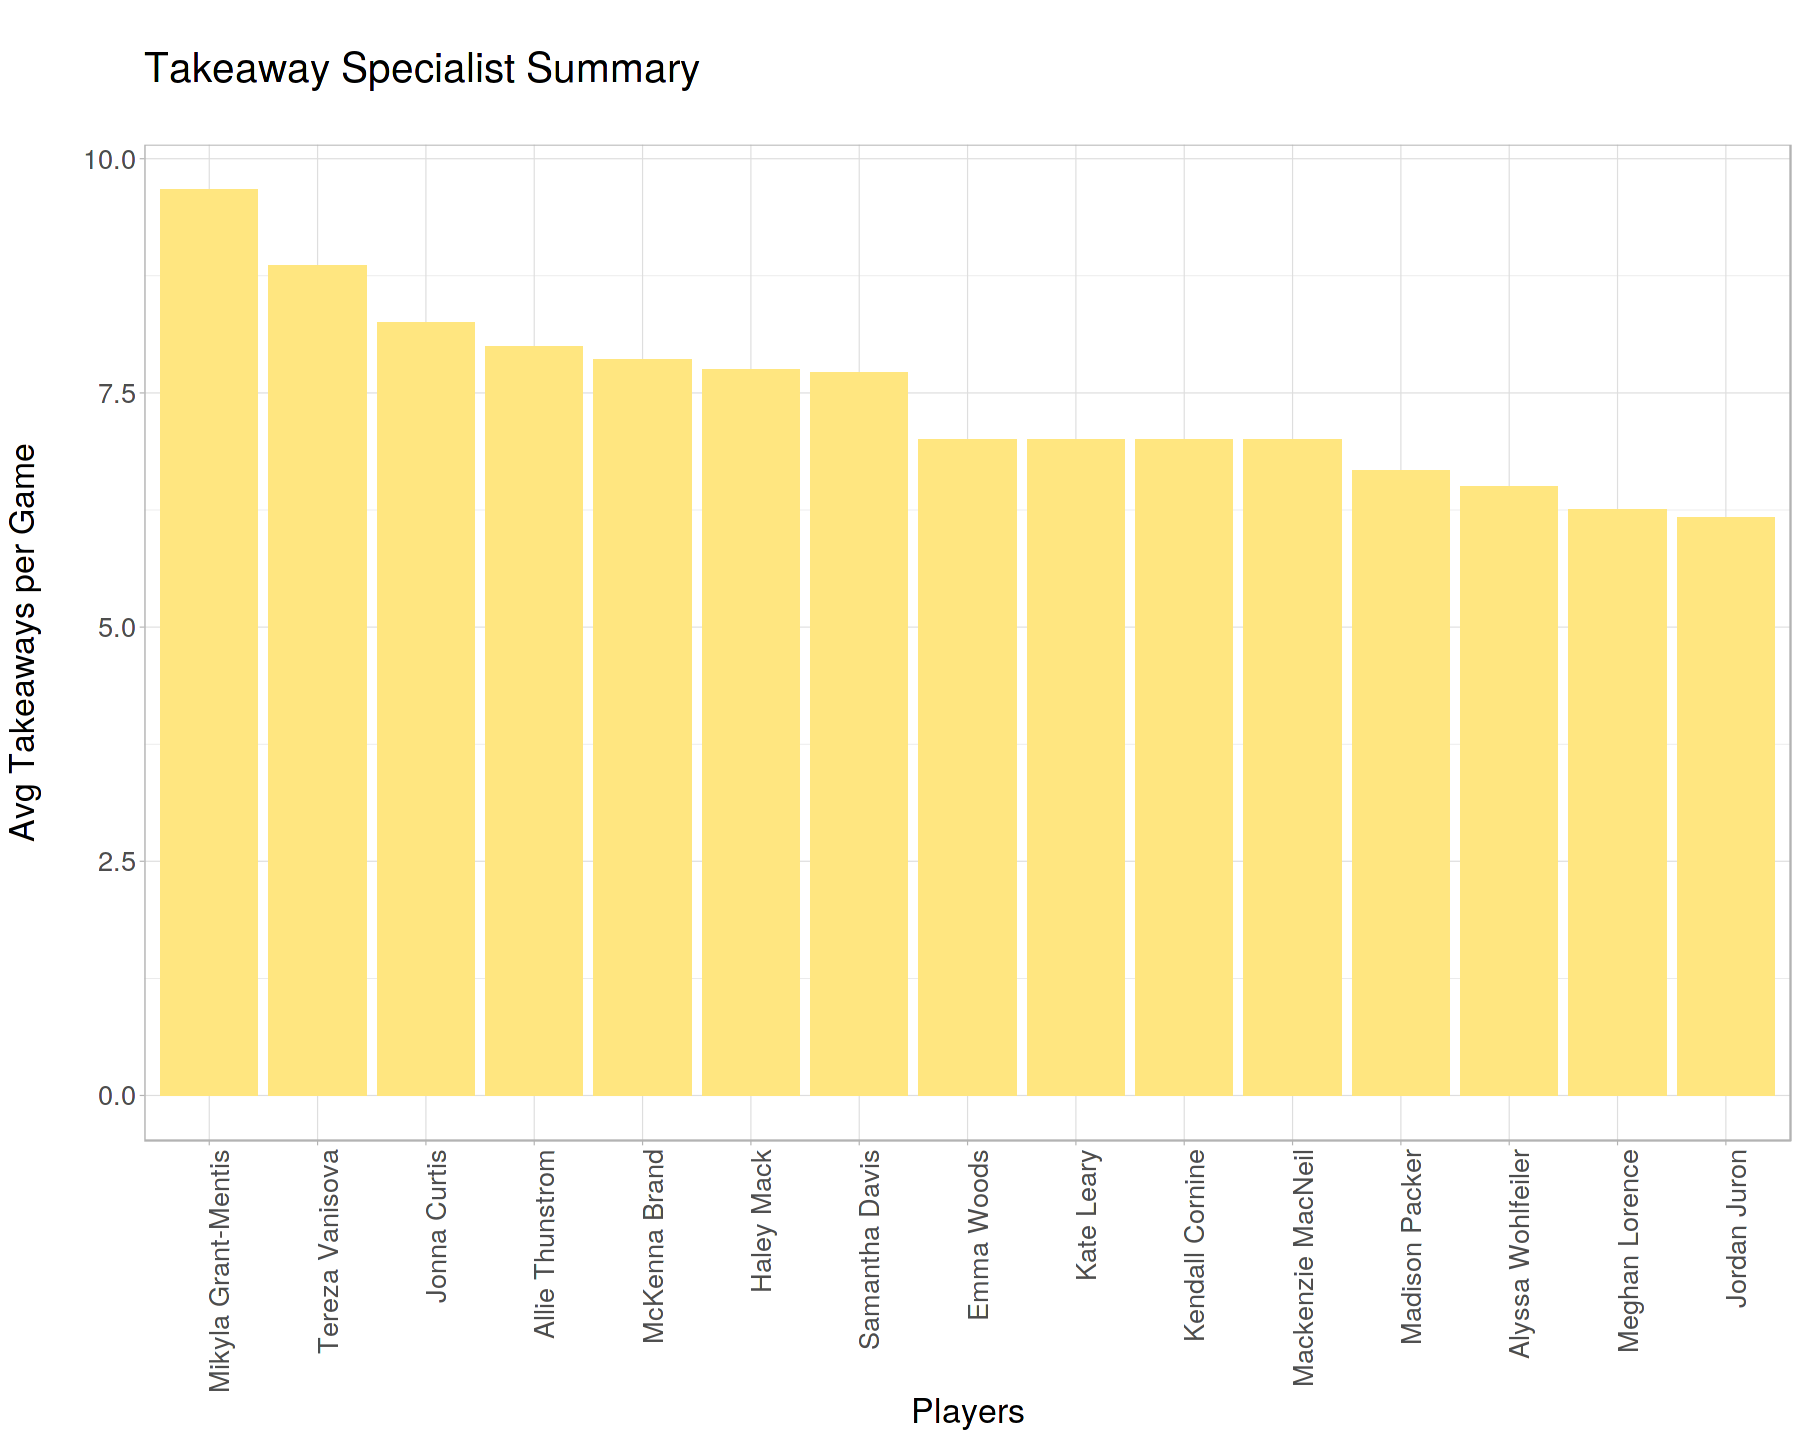

In [229]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_zone_entry_summary_df <- zone_entry_summary_df[1:15, ]

# Use factor to lock the order
subset_zone_entry_summary_df$Player <- factor(subset_zone_entry_summary_df$Player, levels = subset_zone_entry_summary_df$Player[order(-subset_zone_entry_summary_df$Avg_Zone_entry_per_Game)])

# Plot
output <- ggplot(subset_zone_entry_summary_df, mapping=aes(x=Player, y=Avg_Zone_entry_per_Game)) +
       geom_bar(stat = "identity", fill="#ffe680") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Avg Takeaways per Game\n",
        title = paste(
            "\nTakeaway Specialist Summary\n"
        )
      )

print(output)

## Puck Recovery

In [230]:
## Setting the dataframe

puck_recovery_df = nhwl_df[nhwl_df$Event == 'Puck Recovery', ]
#head(takeaway_df, 3)

## Player wise grouping for the 7 days league:

# Total passes scored
total_puck_recovered_df <- puck_recovery_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_puck_recovered_df)[names(total_puck_recovered_df) == "n"] <- "Total_Pucks_Recovered"
drop_colnames <- c("Event")
total_puck_recovered_df <- total_puck_recovered_df[ , !(names(total_puck_recovered_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

## Adding left out players
## Summary of players who never had a takeaway
players_win = as.vector(total_puck_recovered_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never recovered a puck: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Takeaways")
total_puck_recovered_df <- rbind.data.frame(total_puck_recovered_df, added_players)


# Merging the tables to form the summary 
puck_recovery_summary_df <- merge(total_puck_recovered_df, total_games_df, by=c("Player"))

# Getting the average and weighted average
puck_recovery_summary_df <- transform(puck_recovery_summary_df, Avg_Pucks_Recovered_per_Game = as.numeric(Total_Pucks_Recovered) / as.numeric(Number_of_Games))

# Sort by weighted goal average
puck_recovery_summary_df <- puck_recovery_summary_df[with(puck_recovery_summary_df, order(-Avg_Pucks_Recovered_per_Game)), ]

# Reset index to get rankings
row.names(puck_recovery_summary_df) <- NULL


# Display final table
cat("\nPuck Recovery Summary \n")
head(puck_recovery_summary_df, 5)

Number of players who never recovered a puck:  0
Puck Recovery Summary 


,Player,Total_Pucks_Recovered,Number_of_Games,Avg_Pucks_Recovered_per_Game
,<fct>,<int>,<int>,<dbl>
1,Kaleigh Fratkin,233,7,33.28571
2,Sydney Baldwin,126,4,31.50000
3,Shannon Doyle,125,4,31.25000
4,Tori Howran,90,3,30.00000
5,Kiira Dosdall,88,3,29.33333


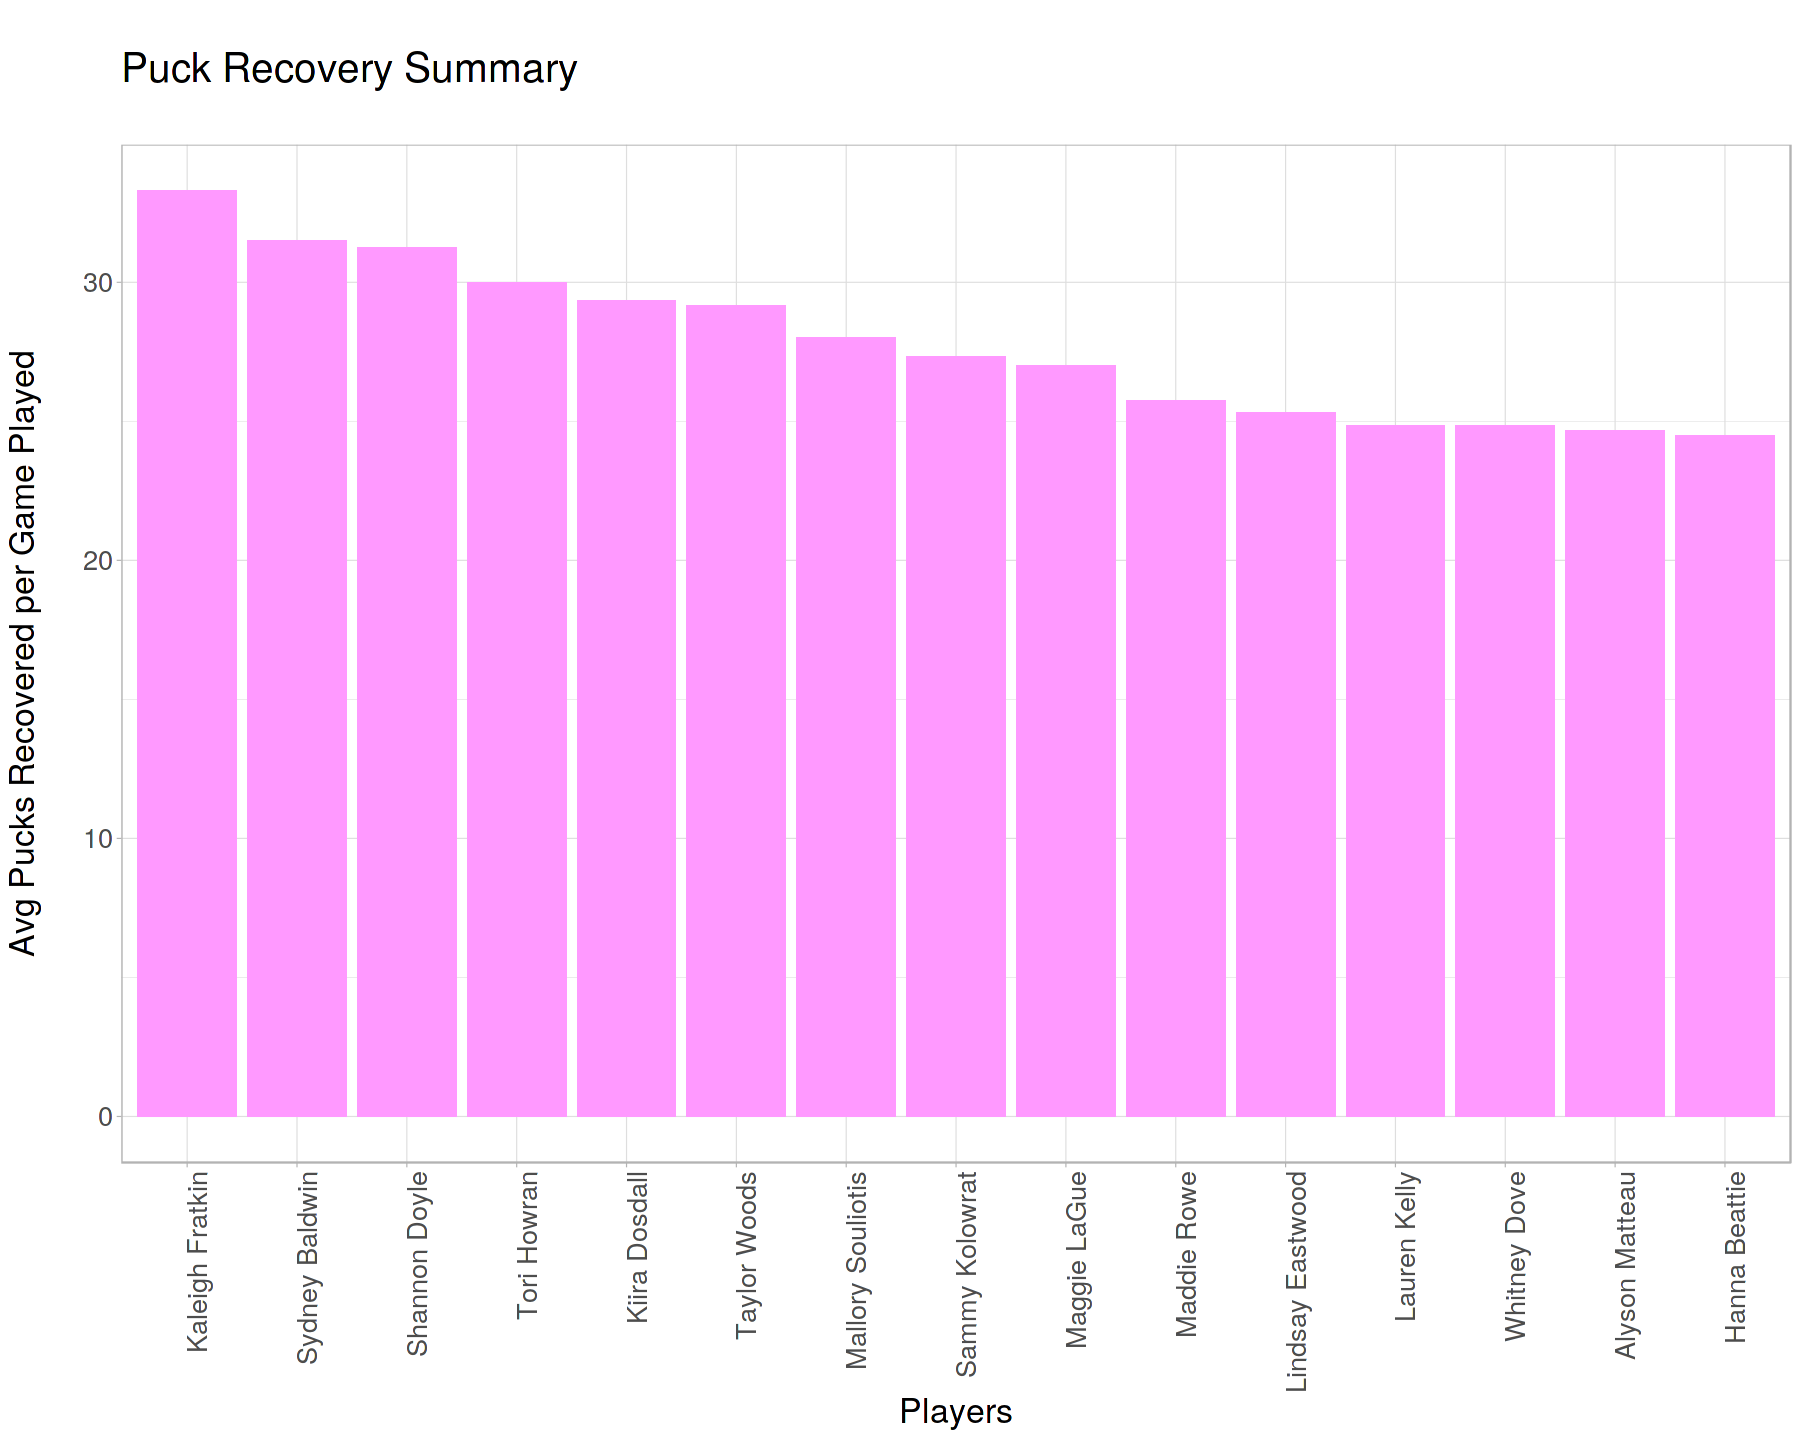

In [231]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_puck_recovery_summary_df <- puck_recovery_summary_df[1:15, ]

# Use factor to lock the order
subset_puck_recovery_summary_df$Player <- factor(subset_puck_recovery_summary_df$Player, levels = subset_puck_recovery_summary_df$Player[order(-subset_puck_recovery_summary_df$Avg_Pucks_Recovered_per_Game)])

# Plot
output <- ggplot(subset_puck_recovery_summary_df, mapping=aes(x=Player, y=Avg_Pucks_Recovered_per_Game)) +
       geom_bar(stat = "identity", fill="#ff99ff") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Avg Pucks Recovered per Game Played\n",
        title = paste(
            "\nPuck Recovery Summary\n"
        )
      )

print(output)

## Dump in/out

In [232]:
## Setting the dataframe
# Play - successful passes
# Incomplete Play - unsucessful passes

dump_inout_df = nhwl_df[nhwl_df$Event == 'Dump In/Out', ]
dump_retained_df = dump_inout_df[dump_inout_df$Detail.1 == "Retained", ]
dump_lost_df = dump_inout_df[dump_inout_df$Detail.1 == "Lost", ]

In [233]:
which(is.na(dump_inout_df$Detail.1)) ## no missing values in Detail of Dump In/Out

integer(0)

In [234]:
# Average Dump In/Out:
# 1. Dumps per Game
# 2. Dumps per (Total Retained + Total Lost)
# 3. Weighted average of the 1. and 2.


## Player wise grouping for the 7 days league:

# Total passes scored
total_dump_retained_df <- dump_retained_df %>%
                            group_by(Player) %>%
                            count(Detail.1, sort=TRUE)
names(total_dump_retained_df)[names(total_dump_retained_df) == "n"] <- "Total_Dumps_Retained"
drop_colnames <- c("Detail.1")
total_dump_retained_df <- total_dump_retained_df[ , !(names(total_dump_retained_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))


# Total passes (unsuccessful) attempted by the players
total_dumps_lost_df <- dump_lost_df %>%
                                group_by(Player) %>%
                                count(Detail.1, sort=TRUE)
names(total_dumps_lost_df)[names(total_dumps_lost_df) == "n"] <- "Total_Dumps_Lost"
drop_colnames <- c("Detail.1")
total_dumps_lost_df <- total_dumps_lost_df[ , !(names(total_dumps_lost_df) %in% drop_colnames)]

In [235]:
## Adding left out players
## Summary of players who never retained a dump in/out
players_win = as.vector(total_dump_retained_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never retained a dump in/out: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Dumps_Retained")
total_dump_retained_df <- rbind.data.frame(total_dump_retained_df, added_players)


## Adding left out players
## Summary of players who never lost a dump in/out
players_win = as.vector(total_dumps_lost_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("\nNumber of players who never lost a dump in/out: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Dumps_Lost")
total_dumps_lost_df <- rbind.data.frame(total_dumps_lost_df, added_players)

Number of players who never retained a dump in/out:  37
Number of players who never lost a dump in/out:  11

In [236]:
# Merging the tables to form the summary 
dump_summary_df <- merge(total_dump_retained_df, total_games_df, by=c("Player"))
dump_summary_df <- merge(dump_summary_df, total_dumps_lost_df, by=c("Player"))

# Getting the average and weighted average
dump_summary_df <- transform(dump_summary_df, Avg_Successful_Dumps_per_Game = as.numeric(Total_Dumps_Retained) / as.numeric(Number_of_Games))
dump_summary_df <- transform(dump_summary_df, Avg_Reatined_Dumps_per_Total_Dumps = as.numeric(Total_Dumps_Retained) / (as.numeric(Total_Dumps_Lost) + as.numeric(Total_Dumps_Retained)))
dump_summary_df <- transform(dump_summary_df, Weighted_Dump_InOut_Avg = ((as.numeric(Avg_Successful_Dumps_per_Game) + as.numeric(Avg_Reatined_Dumps_per_Total_Dumps))/2))

# Sort by weighted goal average
dump_summary_df <- dump_summary_df[with(dump_summary_df, order(-Weighted_Dump_InOut_Avg)), ]

# Reset index to get rankings
row.names(dump_summary_df) <- NULL


# Display final table
cat("\nDump In/Out Summary \n")
head(dump_summary_df, 5)


Dump In/Out Summary 


,Player,Total_Dumps_Retained,Number_of_Games,Total_Dumps_Lost,Avg_Successful_Dumps_per_Game,Avg_Reatined_Dumps_per_Total_Dumps,Weighted_Dump_InOut_Avg
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sarah Hughson,1,1,0,1.000000,1.0000000,1.0000000
2,Saroya Tinker,5,3,13,1.666667,0.2777778,0.9722222
3,Kendall Cornine,4,3,16,1.333333,0.2000000,0.7666667
4,Rachael Ade,1,1,1,1.000000,0.5000000,0.7500000
5,Audra Richards,5,4,20,1.250000,0.2000000,0.7250000


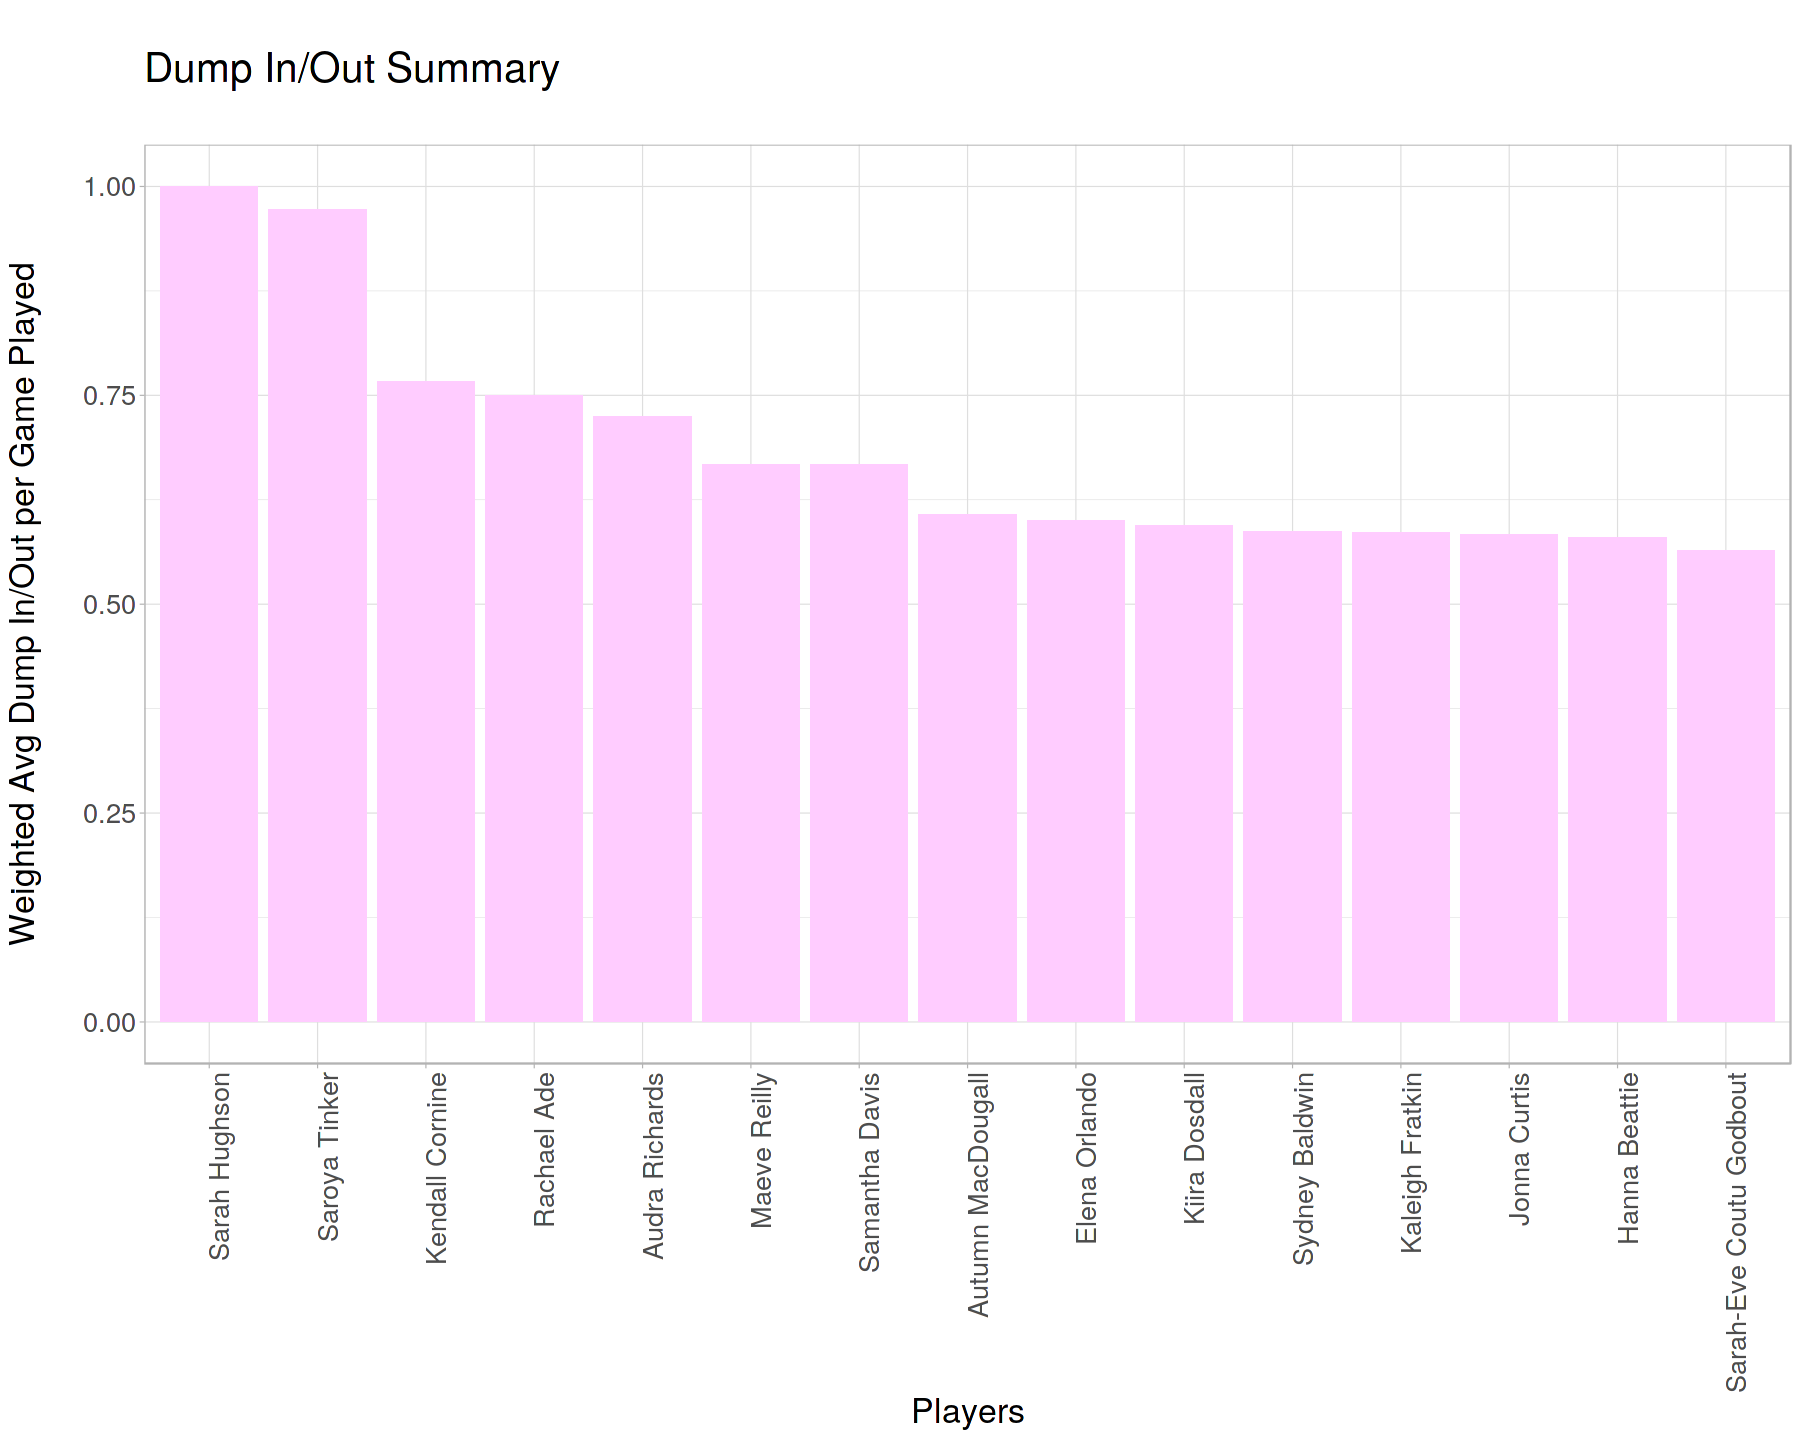

In [237]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_dump_summary_df <- dump_summary_df[1:15, ]

# Use factor to lock the order
subset_dump_summary_df$Player <- factor(subset_dump_summary_df$Player, levels = subset_dump_summary_df$Player[order(-subset_dump_summary_df$Weighted_Dump_InOut_Avg)])

# Plot
output <- ggplot(subset_dump_summary_df, mapping=aes(x=Player, y=Weighted_Dump_InOut_Avg)) +
       geom_bar(stat = "identity", fill="#ffccff") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Weighted Avg Dump In/Out per Game Played\n",
        title = paste(
            "\nDump In/Out Summary\n"
        )
      )

print(output)

## Penalty Taken

In [238]:
## Setting the dataframe

penalty_df = nhwl_df[nhwl_df$Event == 'Penalty Taken', ]
#head(penalty_df, 3)

## Player wise grouping for the 7 days league:

# Total passes scored
total_penalty_df <- penalty_df %>%
                    group_by(Player) %>%
                    count(Event, sort=TRUE)
names(total_penalty_df)[names(total_penalty_df) == "n"] <- "Total_Penalty_Taken"
drop_colnames <- c("Event")
total_penalty_df <- total_penalty_df[ , !(names(total_penalty_df) %in% drop_colnames)]


# Total games played
total_games_df <- nhwl_df %>%
                    group_by(Player) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

## Adding left out players
## Summary of players who never had a takeaway
players_win = as.vector(total_penalty_df$Player)
players_all = as.vector(total_games_df$Player)
diff_players = players_all[!(players_all %in% players_win)]
cat("Number of players who never took a penalty: ", length(diff_players))

#Adding those players
added_players<-data.frame(c(diff_players),
                          c(rep(0, length(diff_players))))
names(added_players)<-c("Player","Total_Penalty_Taken")
total_penalty_df <- rbind.data.frame(total_penalty_df, added_players)


# Merging the tables to form the summary 
penalty_summary_df <- merge(total_penalty_df, total_games_df, by=c("Player"))

# Getting the average and weighted average
penalty_summary_df <- transform(penalty_summary_df, Avg_Penalty_Taken_per_Game = as.numeric(Total_Penalty_Taken) / as.numeric(Number_of_Games))

# Sort by weighted goal average
penalty_summary_df <- penalty_summary_df[with(penalty_summary_df, order(-Avg_Penalty_Taken_per_Game)), ]

# Reset index to get rankings
row.names(penalty_summary_df) <- NULL


# Display final table
cat("\nPenalty Taken Summary \n")
head(penalty_summary_df, 5)

Number of players who never took a penalty:  57
Penalty Taken Summary 


,Player,Total_Penalty_Taken,Number_of_Games,Avg_Penalty_Taken_per_Game
,<fct>,<dbl>,<int>,<dbl>
1,Kayla Meneghin,4,3,1.333333
2,Emma Stauber,5,4,1.250000
3,Kelly Babstock,3,3,1.000000
4,Nicole Guagliardo,2,2,1.000000
5,Rebecca Morse,3,3,1.000000


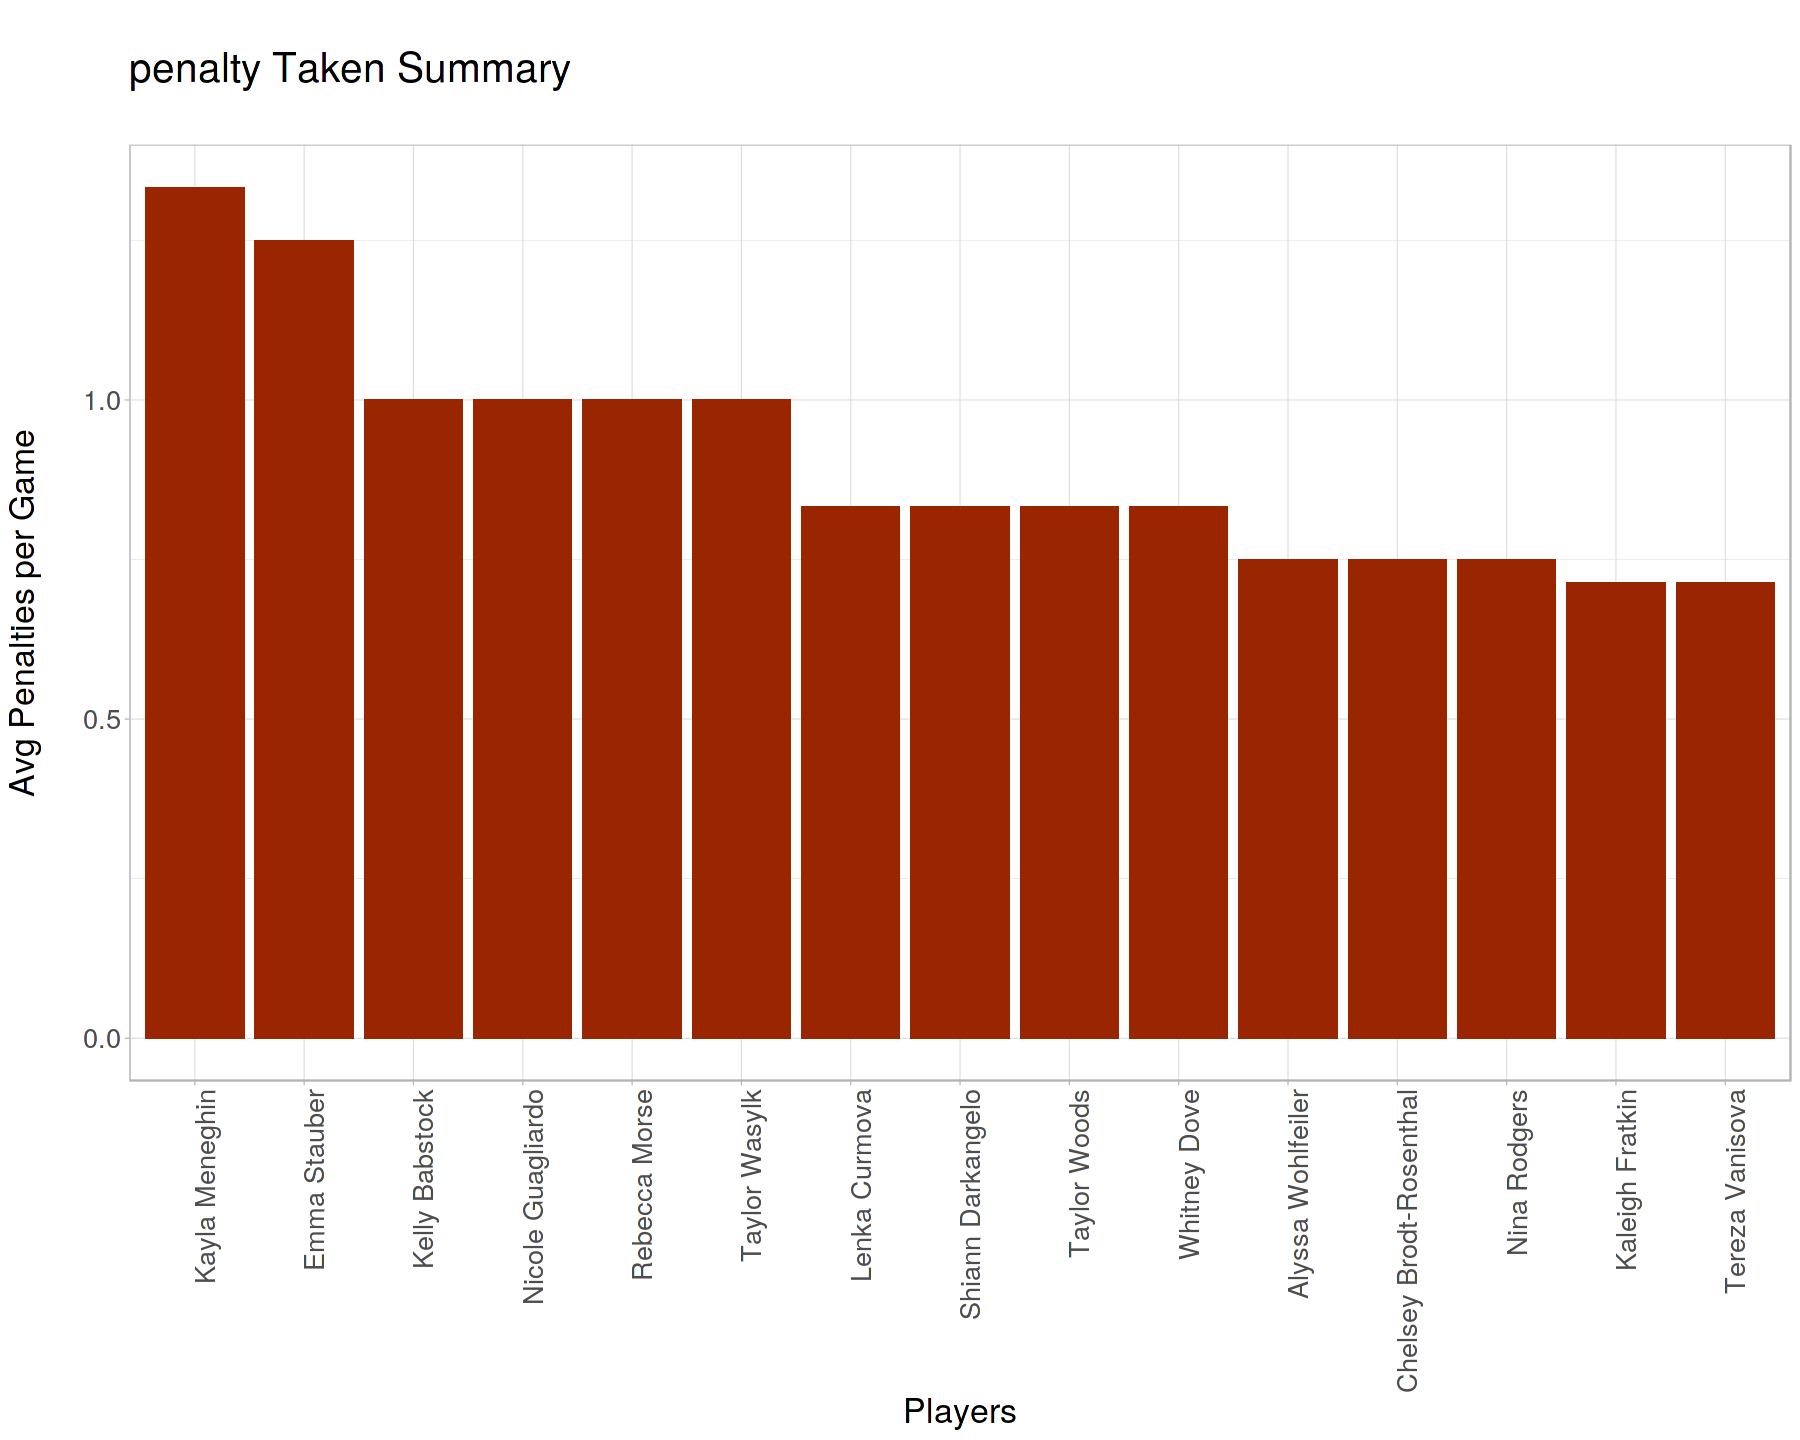

In [239]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_penalty_summary_df <- penalty_summary_df[1:15, ]

# Use factor to lock the order
subset_penalty_summary_df$Player <- factor(subset_penalty_summary_df$Player, levels = subset_penalty_summary_df$Player[order(-subset_penalty_summary_df$Avg_Penalty_Taken_per_Game)])

# Plot
output <- ggplot(subset_penalty_summary_df, mapping=aes(x=Player, y=Avg_Penalty_Taken_per_Game)) +
       geom_bar(stat = "identity", fill="#992600") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Avg Penalties per Game\n",
        title = paste(
            "\npenalty Taken Summary\n"
        )
      )

print(output)

## All Passers Stats

In [240]:
total_games_df <- nhwl_df %>%
                    group_by(Player, Team) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

all_passes_df <- data.frame(Player = c(as.vector(total_games_df$Player)))

all_passes_df$Team = total_games_df$Team
all_passes_df$Number_of_Games = total_games_df$Number_of_Games

# Dropping extra columns
drop_colnames <- c("Number_of_Games")
play_summary_df <- play_summary_df[ , !(names(play_summary_df) %in% drop_colnames)]
success_play_to_goalers <- success_play_to_goalers[ , !(names(success_play_to_goalers) %in% drop_colnames)]
success_play_to_goalers_in_oz_df <- success_play_to_goalers_in_oz_df[ , !(names(success_play_to_goalers_in_oz_df) %in% drop_colnames)]
success_play_oz_df <- success_play_oz_df[ , !(names(success_play_oz_df) %in% drop_colnames)]


# Adding Goal Stats
all_passes_df <- merge(all_passes_df, play_summary_df, by=c("Player"))
all_passes_df <- merge(all_passes_df, success_play_to_goalers, by=c("Player"))
all_passes_df <- merge(all_passes_df, success_play_oz_df, by=c("Player"))
all_passes_df <- merge(all_passes_df, success_play_to_goalers_in_oz_df, by=c("Player"))

#head(all_passes_df)
all_passes_df <- transform(all_passes_df, Final_Passing_Score = (as.numeric(Weighted_Pass_Avg) + as.numeric(Weighted_Success_Pass_Rate_to_Goalers) + as.numeric(Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone) + as.numeric(Weighted_Overall_Success_Pass_Rate_Offensive_Zone)))
# Sort by weighted goal average
all_passes_df <- all_passes_df[with(all_passes_df, order(-Final_Passing_Score)), ]

# Reset index to get rankings
row.names(all_passes_df) <- NULL

# Best Players overall
# Display final table
cat("\nBest Passers overall \n")
head(all_passes_df, 15)

library("writexl")
write_xlsx(all_passes_df,"passers_stats.xlsx")

`summarise()` has grouped output by 'Player'. You can override using the `.groups` argument.




Best Passers overall 


,Player,Team,Number_of_Games,Total_Plays,Total_Incomplete_Plays,Avg_Passes_per_Game,Avg_Success_Passes_per_Play,Weighted_Pass_Avg,Total_Plays_to_Best_Goalers,Total_Incomplete_Plays_to_Best_Goalers,Avg_Successful_Plays_to_Goalers,Success_Rate_per_Total_Passes_to_Goalers,Weighted_Success_Pass_Rate_to_Goalers,Total_Plays_Offensive_Zone,Total_Incomplete_Plays_Offensive_Zone,Avg_Successful_Plays_OZ,Success_Rate_per_Total_Passes_OZ,Weighted_Overall_Success_Pass_Rate_Offensive_Zone,Total_Plays_to_Goalers_in_Offensive_Zone,Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone,Avg_Successful_Plays_to_Goalers_in_OZ,Success_Rate_per_Total_Passes_OZ_to_Goalers,Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone,Final_Passing_Score
,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Kaleigh Fratkin,Boston Pride,7,242,90,34.57143,0.7289157,17.650172,34,18,4.857143,0.6538462,2.755495,6,6,0.8571429,0.5000000,0.6785714,2,0,0.2857143,1.0000000,0.6428571,21.72710
2,Sydney Baldwin,Minnesota Whitecaps,4,112,49,28.00000,0.6956522,14.347826,39,23,9.750000,0.6290323,5.189516,3,1,0.7500000,0.7500000,0.7500000,2,1,0.5000000,0.6666667,0.5833333,20.87068
3,Shiann Darkangelo,Toronto Six,6,154,63,25.66667,0.7096774,13.188172,13,11,2.166667,0.5416667,1.354167,56,24,9.3333333,0.7000000,5.0166667,3,3,0.5000000,0.5000000,0.5000000,20.05901
4,Madison Packer,Metropolitan Riveters,3,74,24,24.66667,0.7551020,12.710884,13,6,4.333333,0.6842105,2.508772,14,4,4.6666667,0.7777778,2.7222222,2,0,0.6666667,1.0000000,0.8333333,18.77521
5,Kiira Dosdall,Metropolitan Riveters,3,91,34,30.33333,0.7280000,15.530667,13,10,4.333333,0.5652174,2.449275,0,1,0.0000000,0.0000000,0.0000000,0,1,0.0000000,0.0000000,0.0000000,17.97994
6,Taylor Woods,Toronto Six,6,157,46,26.16667,0.7733990,13.470033,27,8,4.500000,0.7714286,2.635714,4,0,0.6666667,1.0000000,0.8333333,0,0,0.0000000,0.0000000,0.0000000,16.93908
7,Jonna Curtis,Minnesota Whitecaps,4,57,37,14.25000,0.6063830,7.428191,30,15,7.500000,0.6666667,4.083333,21,13,5.2500000,0.6176471,2.9338235,16,5,4.0000000,0.7619048,2.3809524,16.82630
8,Kate Leary,Metropolitan Riveters,3,54,13,18.00000,0.8059701,9.402985,12,6,4.000000,0.6666667,2.333333,20,5,6.6666667,0.8000000,3.7333333,4,2,1.3333333,0.6666667,1.0000000,16.46965
9,McKenna Brand,Boston Pride,7,142,34,20.28571,0.8068182,10.546266,31,13,4.428571,0.7045455,2.566558,30,10,4.2857143,0.7500000,2.5178571,6,3,0.8571429,0.6666667,0.7619048,16.39259


## Analyzing Overall Profile of Players

**The variables and corresponding weightage considered:**

<br> 1. <b>Goals</b>: weighted avg goals -- 2 for goalers, 1 for others
<br> 2. <b>Plays</b>: weighted avg plays -- 2 for passers, 1 for others
<br> 3. <b>Face-off wins</b>: avg wins -- 2 for face-off specialists, 1 for others
<br> 4. <b>Take-away</b>: avg takeaways -- 2 for takeaway specialists, 1 for others
<br> 5. <b>Zone-entry</b>: avg zone entries per game -- 1 for all
<br> 6. <b>Dump-in/out</b>: weighted avg dumps where possession was gained -- 1 for all
<br> 7. <b>Puck-recovery</b>: avg pucks recovered per game -- 1 for all
<br> 8. <b>Penalty taken</b>: avg penalties per game -- (-1) for all

goal_summary_df
<br>play_summary_df
<br>faceoff_wins_summary_df
<br>takeaway_summary_df
<br>zone_entry_summary_df
<br>puck_recovery_summary_df
<br>dump_summary_df
<br>penalty_summary_df


In [241]:
total_games_df <- nhwl_df %>%
                    group_by(Player, Team) %>%
                    summarise(Number_of_Games = n_distinct(game_date))

`summarise()` has grouped output by 'Player'. You can override using the `.groups` argument.



In [242]:
complete_events_df <- data.frame(Player = c(as.vector(total_games_df$Player)))

complete_events_df$Team = total_games_df$Team
complete_events_df$Number_of_Games = total_games_df$Number_of_Games

# Dropping extra columns
drop_colnames <- c("Number_of_Games")
goal_summary_df <- goal_summary_df[ , !(names(goal_summary_df) %in% drop_colnames)]
all_passes_df <- all_passes_df[ , !(names(all_passes_df) %in% drop_colnames)]
faceoff_wins_summary_df <- faceoff_wins_summary_df[ , !(names(faceoff_wins_summary_df) %in% drop_colnames)]
takeaway_summary_df <- takeaway_summary_df[ , !(names(takeaway_summary_df) %in% drop_colnames)]
zone_entry_summary_df <- zone_entry_summary_df[ , !(names(zone_entry_summary_df) %in% drop_colnames)]
dump_summary_df <- dump_summary_df[ , !(names(dump_summary_df) %in% drop_colnames)]
puck_recovery_summary_df <- puck_recovery_summary_df[ , !(names(puck_recovery_summary_df) %in% drop_colnames)]
penalty_summary_df <- penalty_summary_df[ , !(names(penalty_summary_df) %in% drop_colnames)]


# Adding Goal Stats
complete_events_df <- merge(complete_events_df, goal_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, all_passes_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, faceoff_wins_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, takeaway_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, zone_entry_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, puck_recovery_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, dump_summary_df, by=c("Player"))
complete_events_df <- merge(complete_events_df, penalty_summary_df, by=c("Player"))

# Taking care of null
complete_events_df[is.na(complete_events_df)] <- 0
head(complete_events_df)

,Player,Team.x,Number_of_Games,Total_Goals,Total_Shots,Time_on_Ice,Goals_per_Game,Points_per_60,Shooting_Percentage,Weighted_Goal_Avg,Team.y,Total_Plays,Total_Incomplete_Plays,Avg_Passes_per_Game,Avg_Success_Passes_per_Play,Weighted_Pass_Avg,Total_Plays_to_Best_Goalers,Total_Incomplete_Plays_to_Best_Goalers,Avg_Successful_Plays_to_Goalers,Success_Rate_per_Total_Passes_to_Goalers,Weighted_Success_Pass_Rate_to_Goalers,Total_Plays_Offensive_Zone,Total_Incomplete_Plays_Offensive_Zone,Avg_Successful_Plays_OZ,Success_Rate_per_Total_Passes_OZ,Weighted_Overall_Success_Pass_Rate_Offensive_Zone,Total_Plays_to_Goalers_in_Offensive_Zone,Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone,Avg_Successful_Plays_to_Goalers_in_OZ,Success_Rate_per_Total_Passes_OZ_to_Goalers,Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone,Final_Passing_Score,Total_Faceoff_Wins,Avg_Faceoff_Wins_per_Game,Total_Takeaways,Avg_Takeaways_per_Game,Total_Zone_Entries,Avg_Zone_entry_per_Game,Total_Pucks_Recovered,Avg_Pucks_Recovered_per_Game,Total_Dumps_Retained,Total_Dumps_Lost,Avg_Successful_Dumps_per_Game,Avg_Reatined_Dumps_per_Total_Dumps,Weighted_Dump_InOut_Avg,Total_Penalty_Taken,Avg_Penalty_Taken_per_Game
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Abbie Ives,Connecticut Whale,4,0,0,160,0.00,0.000000000,0.00000000,0.00000000,Connecticut Whale,13,3,3.250000,0.8125000,2.031250,0,0,0.0000000,0.0000000,0.0000000,0,0,0.000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,2.031250,0,0.00,0,0.000000,0,0.000000,22,5.50000,0,0,0.0000000,0.00000000,0.0000000,0,0.0000000
2,Allie Olnowich,Metropolitan Riveters,3,0,10,180,0.00,0.000000000,0.00000000,0.00000000,Metropolitan Riveters,23,7,7.666667,0.7666667,4.216667,1,1,0.3333333,0.5000000,0.4166667,0,0,0.000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,4.633333,0,0.00,5,1.666667,3,1.000000,31,10.33333,1,9,0.3333333,0.10000000,0.2166667,0,0.0000000
3,Allie Thunstrom,Minnesota Whitecaps,4,0,28,260,0.00,0.000000000,0.00000000,0.00000000,Minnesota Whitecaps,45,24,11.250000,0.6521739,5.951087,17,12,4.2500000,0.5862069,2.4181034,18,11,4.500000,0.6206897,2.5603448,8,5,2.0000000,0.6153846,1.3076923,12.237228,1,0.25,14,3.500000,32,8.000000,57,14.25000,2,22,0.5000000,0.08333333,0.2916667,2,0.5000000
4,Alyson Matteau,Buffalo Beauts,6,0,23,380,0.00,0.000000000,0.00000000,0.00000000,Buffalo Beauts,130,49,21.666667,0.7262570,11.196462,12,5,2.0000000,0.7058824,1.3529412,7,4,1.166667,0.6363636,0.9015152,1,0,0.1666667,1.0000000,0.5833333,14.034251,0,0.00,28,4.666667,17,2.833333,148,24.66667,1,19,0.1666667,0.05000000,0.1083333,1,0.1666667
5,Alyssa Wohlfeiler,Connecticut Whale,4,1,24,260,0.25,0.003846154,0.04000000,0.02192308,Connecticut Whale,87,27,21.750000,0.7631579,11.256579,0,0,0.0000000,0.0000000,0.0000000,21,10,5.250000,0.6774194,2.9637097,0,0,0.0000000,0.0000000,0.0000000,14.220289,0,0.00,8,2.000000,26,6.500000,52,13.00000,1,7,0.2500000,0.12500000,0.1875000,3,0.7500000
6,Amanda Conway,Connecticut Whale,4,1,10,240,0.25,0.004166667,0.09090909,0.04753788,Connecticut Whale,18,17,4.500000,0.5142857,2.507143,0,0,0.0000000,0.0000000,0.0000000,8,4,2.000000,0.6666667,1.3333333,0,0,0.0000000,0.0000000,0.0000000,3.840476,0,0.00,3,0.750000,10,2.500000,24,6.00000,0,4,0.0000000,0.00000000,0.0000000,0,0.0000000


In [243]:
# For Best Players:
complete_events_df <- transform(complete_events_df, Final_Score = (2*as.numeric(Weighted_Goal_Avg) + 2*as.numeric(Weighted_Pass_Avg) + as.numeric(Avg_Faceoff_Wins_per_Game) + as.numeric(Avg_Takeaways_per_Game) + as.numeric(Avg_Zone_entry_per_Game) +  as.numeric(Avg_Pucks_Recovered_per_Game) + as.numeric(Weighted_Dump_InOut_Avg) - as.numeric(Avg_Penalty_Taken_per_Game)))

# Sort by weighted goal average
complete_events_df <- complete_events_df[with(complete_events_df, order(-Final_Score)), ]

# Reset index to get rankings
row.names(complete_events_df) <- NULL

# Best Players overall
# Display final table
cat("\nBest Players overall \n")
head(complete_events_df, 15)


Best Players overall 


,Player,Team.x,Number_of_Games,Total_Goals,Total_Shots,Time_on_Ice,Goals_per_Game,Points_per_60,Shooting_Percentage,Weighted_Goal_Avg,Team.y,Total_Plays,Total_Incomplete_Plays,Avg_Passes_per_Game,Avg_Success_Passes_per_Play,Weighted_Pass_Avg,Total_Plays_to_Best_Goalers,Total_Incomplete_Plays_to_Best_Goalers,Avg_Successful_Plays_to_Goalers,Success_Rate_per_Total_Passes_to_Goalers,Weighted_Success_Pass_Rate_to_Goalers,Total_Plays_Offensive_Zone,Total_Incomplete_Plays_Offensive_Zone,Avg_Successful_Plays_OZ,Success_Rate_per_Total_Passes_OZ,Weighted_Overall_Success_Pass_Rate_Offensive_Zone,Total_Plays_to_Goalers_in_Offensive_Zone,Total_Incomplete_Plays_to_Goalers_in_Offensive_Zone,Avg_Successful_Plays_to_Goalers_in_OZ,Success_Rate_per_Total_Passes_OZ_to_Goalers,Weighted_Overall_Success_Pass_Rate_to_Goalers_in_Offensive_Zone,Final_Passing_Score,Total_Faceoff_Wins,Avg_Faceoff_Wins_per_Game,Total_Takeaways,Avg_Takeaways_per_Game,Total_Zone_Entries,Avg_Zone_entry_per_Game,Total_Pucks_Recovered,Avg_Pucks_Recovered_per_Game,Total_Dumps_Retained,Total_Dumps_Lost,Avg_Successful_Dumps_per_Game,Avg_Reatined_Dumps_per_Total_Dumps,Weighted_Dump_InOut_Avg,Total_Penalty_Taken,Avg_Penalty_Taken_per_Game,Final_Score
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Kaleigh Fratkin,Boston Pride,7,0,36,420,0.0000000,0.000000000,0.00000000,0.00000000,Boston Pride,242,90,34.57143,0.7289157,17.65017,34,18,4.857143,0.6538462,2.755495,6,6,0.8571429,0.5000000,0.6785714,2,0,0.2857143,1.0000000,0.6428571,21.72710,0,0.0000000,16,2.285714,23,3.285714,233,33.28571,7,34,1.0000000,0.17073171,0.5853659,5,0.7142857,74.02857
2,Shiann Darkangelo,Toronto Six,6,0,36,380,0.0000000,0.000000000,0.00000000,0.00000000,Toronto Six,154,63,25.66667,0.7096774,13.18817,13,11,2.166667,0.5416667,1.354167,56,24,9.3333333,0.7000000,5.0166667,3,3,0.5000000,0.5000000,0.5000000,20.05901,79,13.1666667,23,3.833333,37,6.166667,141,23.50000,4,21,0.6666667,0.16000000,0.4133333,5,0.8333333,72.62301
3,Sydney Baldwin,Minnesota Whitecaps,4,1,32,260,0.2500000,0.003846154,0.03030303,0.01707459,Minnesota Whitecaps,112,49,28.00000,0.6956522,14.34783,39,23,9.750000,0.6290323,5.189516,3,1,0.7500000,0.7500000,0.7500000,2,1,0.5000000,0.6666667,0.5833333,20.87068,0,0.0000000,21,5.250000,11,2.750000,126,31.50000,4,19,1.0000000,0.17391304,0.5869565,2,0.5000000,68.31676
4,Kiira Dosdall,Metropolitan Riveters,3,0,17,180,0.0000000,0.000000000,0.00000000,0.00000000,Metropolitan Riveters,91,34,30.33333,0.7280000,15.53067,13,10,4.333333,0.5652174,2.449275,0,1,0.0000000,0.0000000,0.0000000,0,1,0.0000000,0.0000000,0.0000000,17.97994,0,0.0000000,8,2.666667,12,4.000000,88,29.33333,3,13,1.0000000,0.18750000,0.5937500,0,0.0000000,67.65508
5,Taylor Woods,Toronto Six,6,4,42,380,0.6666667,0.010526316,0.08695652,0.04874142,Toronto Six,157,46,26.16667,0.7733990,13.47003,27,8,4.500000,0.7714286,2.635714,4,0,0.6666667,1.0000000,0.8333333,0,0,0.0000000,0.0000000,0.0000000,16.93908,2,0.3333333,14,2.333333,30,5.000000,175,29.16667,2,29,0.3333333,0.06451613,0.1989247,5,0.8333333,63.23647
6,Tori Howran,Connecticut Whale,3,1,13,200,0.3333333,0.005000000,0.07142857,0.03821429,Connecticut Whale,74,35,24.66667,0.6788991,12.67278,0,0,0.000000,0.0000000,0.000000,5,1,1.6666667,0.8333333,1.2500000,0,0,0.0000000,0.0000000,0.0000000,13.92278,0,0.0000000,13,4.333333,9,3.000000,90,30.00000,1,15,0.3333333,0.06250000,0.1979167,0,0.0000000,62.95324
7,Shannon Doyle,Connecticut Whale,4,0,19,260,0.0000000,0.000000000,0.00000000,0.00000000,Connecticut Whale,99,59,24.75000,0.6265823,12.68829,0,0,0.000000,0.0000000,0.000000,0,2,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,12.68829,0,0.0000000,17,4.250000,6,1.500000,125,31.25000,1,22,0.2500000,0.04347826,0.1467391,0,0.0000000,62.52332
8,Mallory 

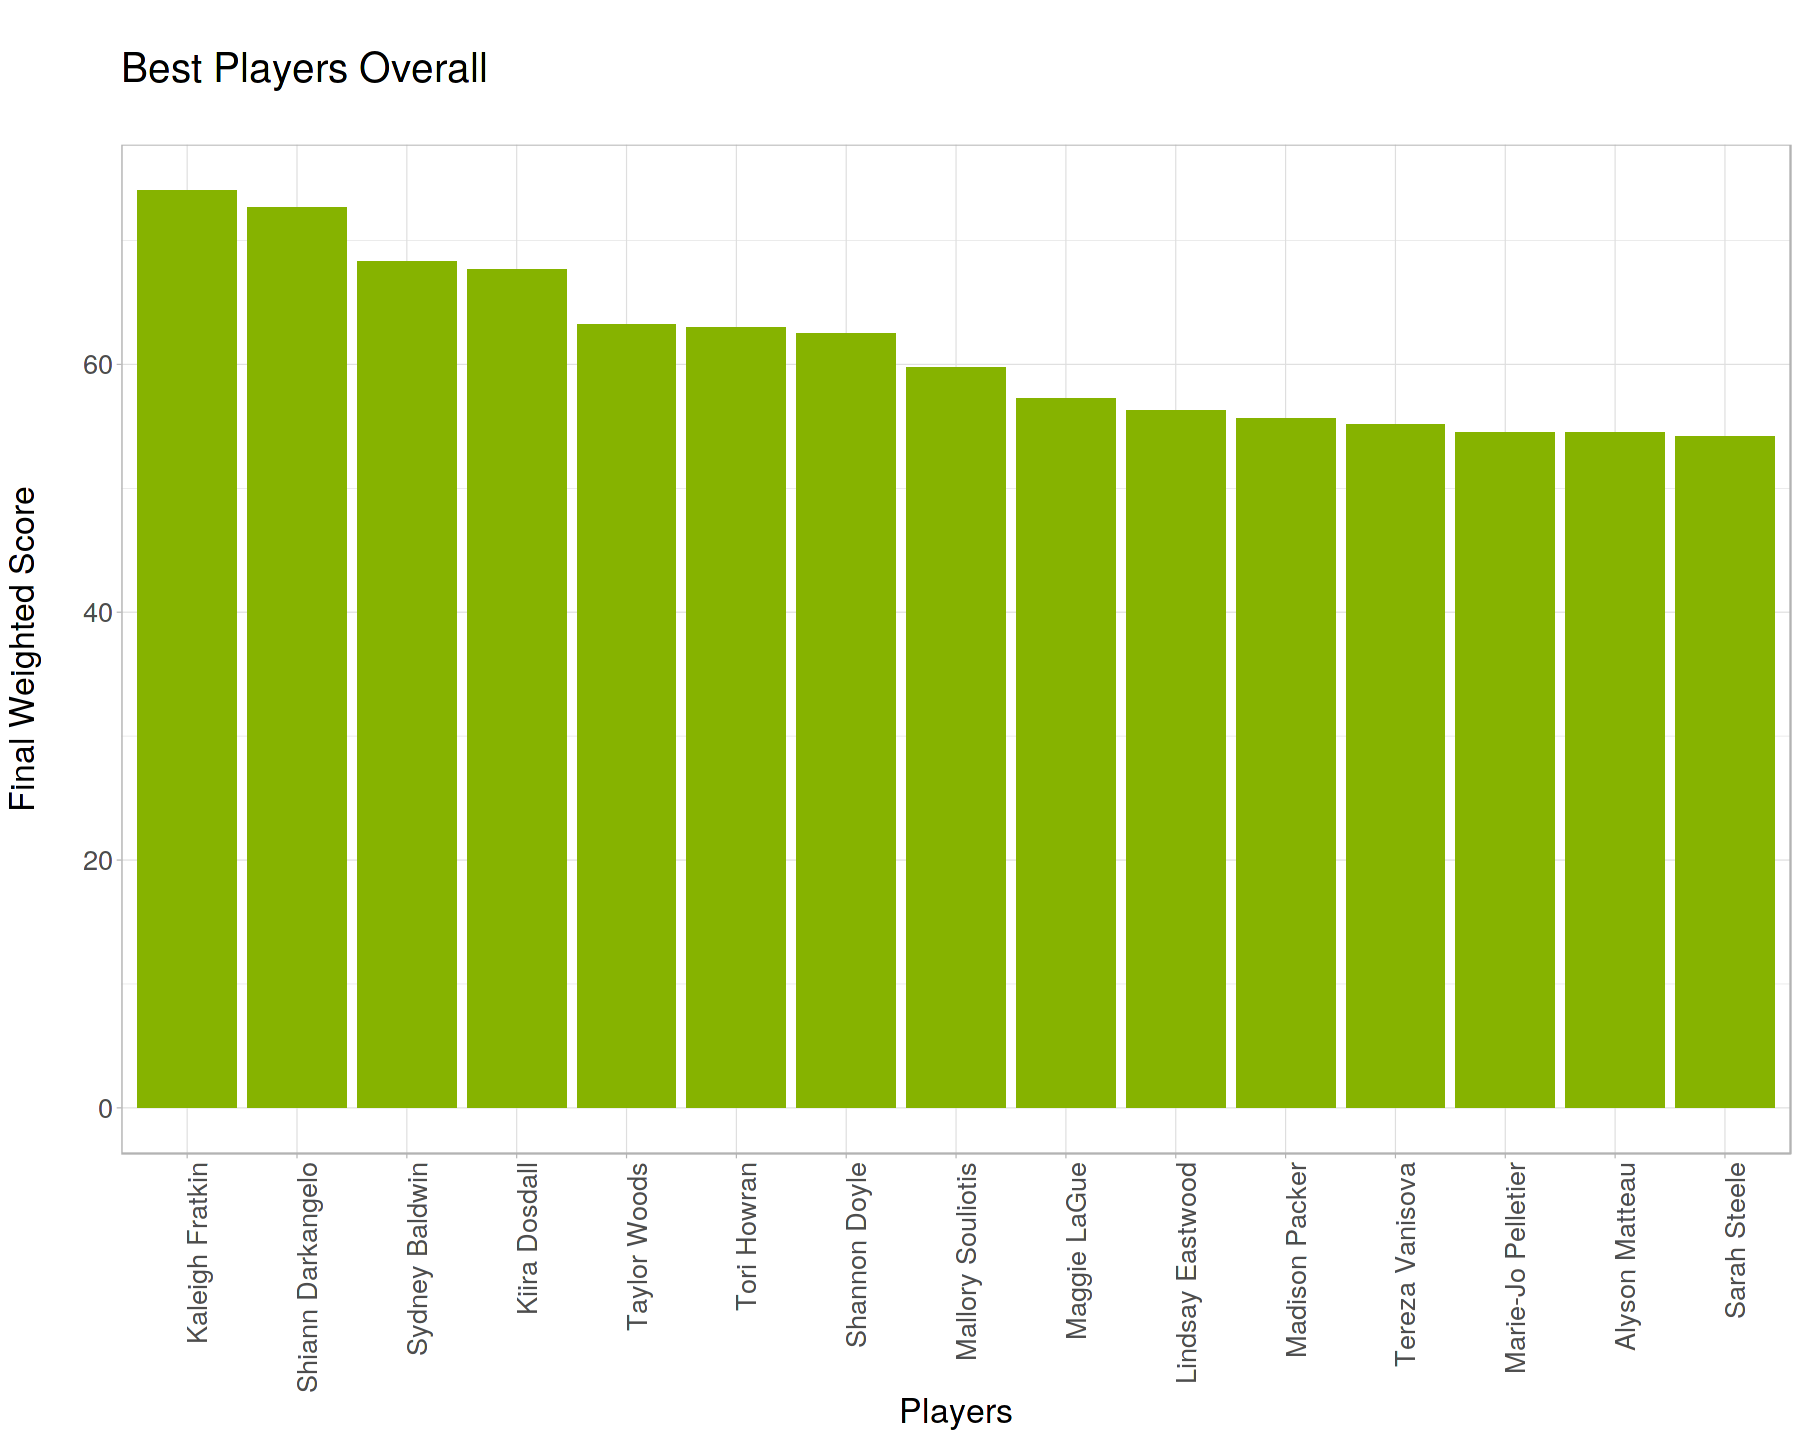

In [244]:
# Plotting

options(repr.plot.width=15, repr.plot.height=12)

# Select the top 15 players
subset_complete_events_df <- complete_events_df[1:15, ]

# Use factor to lock the order
subset_complete_events_df$Player <- factor(subset_complete_events_df$Player, levels = subset_complete_events_df$Player[order(-subset_complete_events_df$Final_Score)])

# Plot
g <- ggplot(subset_complete_events_df, mapping=aes(x=Player, y=Final_Score)) +
       geom_bar(stat = "identity", fill="#86b300") +
        theme_light() +
        theme(text = element_text(size=20),
                axis.text.x = element_text(angle=90, hjust=1)) +
        labs(
        x = "Players",
        y = "Final Weighted Score\n",
        title = paste(
            "\nBest Players Overall\n"
        )
      )

print(g)

In [245]:
library("writexl")
write_xlsx(complete_events_df,"all_events_stats.xlsx")